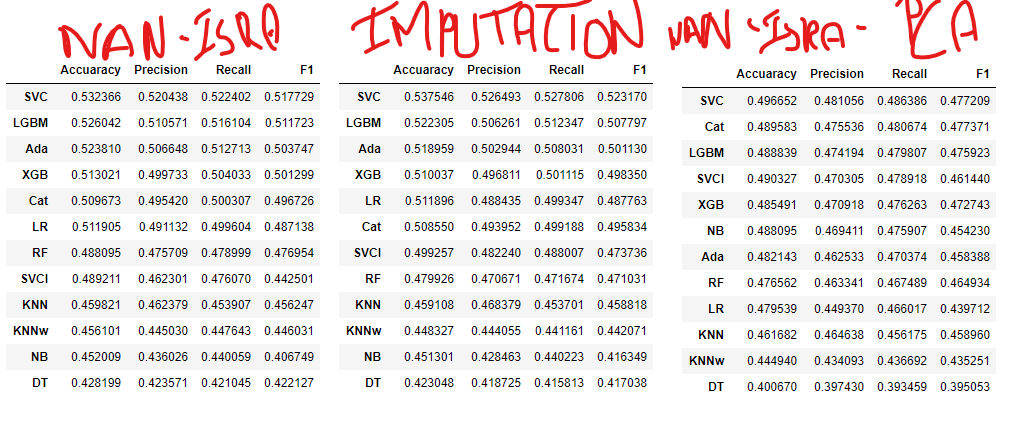!

In [1]:
from IPython.display import HTML
import random
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
    toggle_text = 'Toggle show/hide'  
    target_cell = this_cell  
    js_hide_current = ''
    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'
    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))
    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}
            {js_hide_current}
        </script>
        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )
    return HTML(html)
hide_toggle()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
hide_toggle()
%matplotlib inline

In [3]:
train = pd.read_csv('./Data\Train_clu.csv') 

In [4]:
train

,Unnamed: 0,Unnamed: 0.1,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,cluster
0,0,0,0,0,22,0,Healthcare,1,Low,4,4,D,3
1,1,1,1,1,38,1,Engineer,3,Average,3,4,A,3
2,2,2,1,1,67,1,Engineer,1,Low,1,6,B,0
3,3,3,0,1,67,1,Lawyer,0,High,2,6,B,0
4,4,4,1,1,40,1,Entertainment,1,High,6,6,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,8057,8063,0,0,22,0,Unknown,0,Low,7,1,D,2
8058,8058,8064,0,0,35,0,Executive,3,Low,4,4,D,2
8059,8059,8065,1,0,33,1,Healthcare,1,Low,1,6,D,3
8060,8060,8066,1,0,27,1,Healthcare,1,Low,4,6,B,3


In [5]:
train.drop(['Segmentation', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)


In [6]:
train.rename(columns = {'cluster':'Segmentation'}, inplace = True)

In [7]:
test = pd.read_csv('./Data\Test.csv') 

In [8]:
submission = pd.read_csv('./Data\sample_submission.csv') 

In [9]:
y = train['Segmentation']
X = train[train.columns[:-1]]


Automatically created module for IPython interactive environment


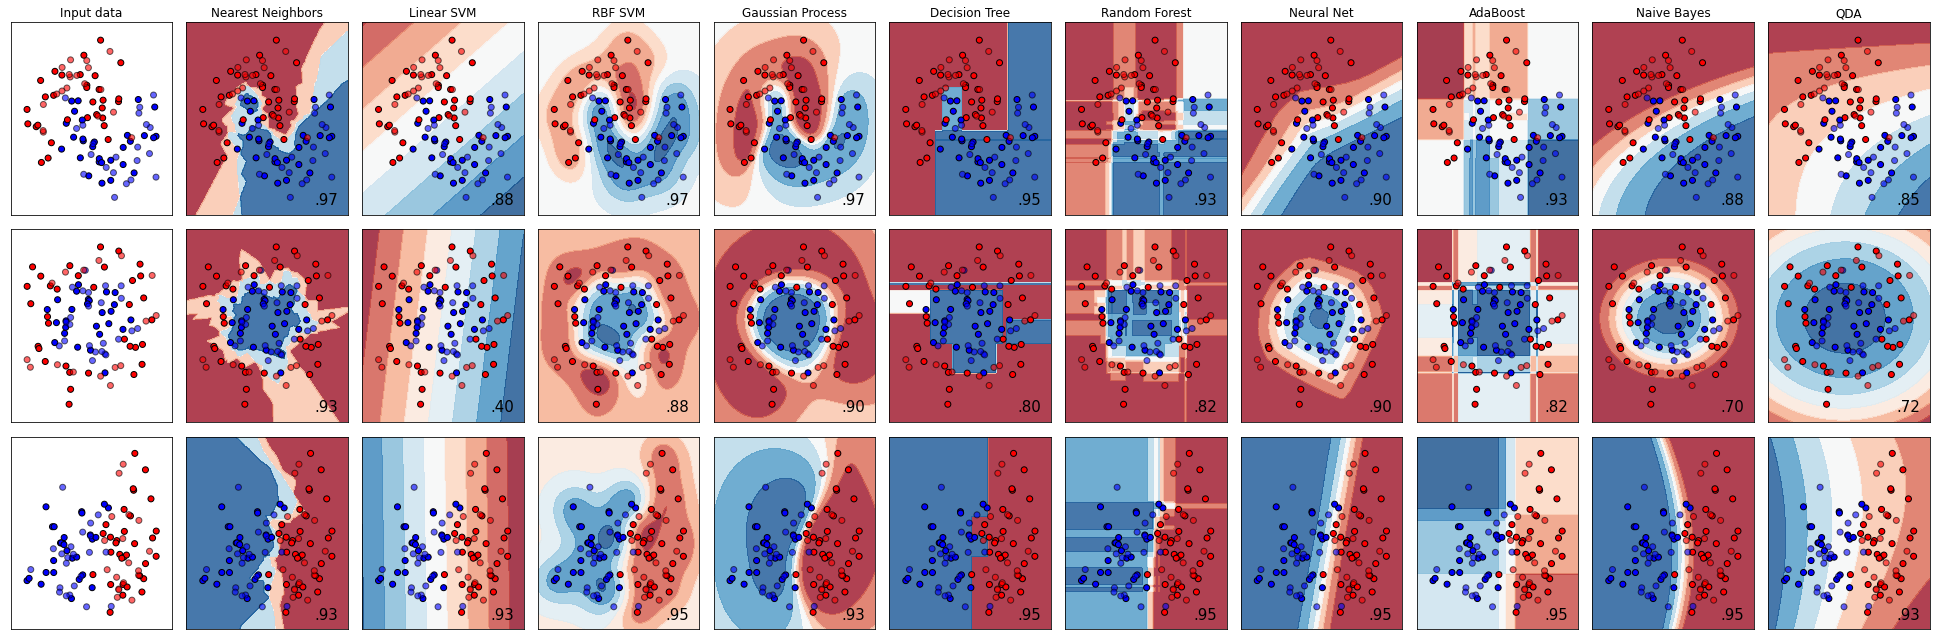

In [10]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()
hide_toggle()

# Fill Values 

In [11]:
test.isna().sum().sort_values(ascending=False)

Work_Experience    269
Family_Size        113
Ever_Married        50
Profession          38
Var_1               32
Graduated           24
ID                   0
Gender               0
Age                  0
Spending_Score       0
dtype: int64

In [12]:
train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [13]:
train.Segmentation.unique()

array([3, 0, 2, 1], dtype=int64)

## Filling Values Work_Experience per Segmentation

### Segment A

In [14]:
train.shape

(8062, 10)

<AxesSubplot:>

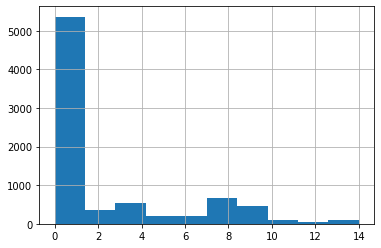

In [15]:
train['Work_Experience'].hist()

<AxesSubplot:ylabel='Density'>

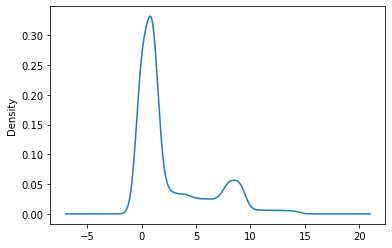

In [16]:
train['Work_Experience'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

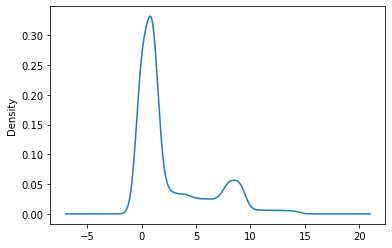

In [17]:
train['Work_Experience'].plot(kind='kde') #After removing NANs

In [18]:
train.loc[train['Segmentation']==0].head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2,1,1,67,1,Engineer,1,Low,1,6,0
3,0,1,67,1,Lawyer,0,High,2,6,0
4,1,1,40,1,Entertainment,1,High,6,6,0
5,0,1,56,0,Artist,0,Average,2,6,0
9,1,1,55,1,Artist,1,Average,4,6,0


In [19]:
train.groupby(['Gender', 'Age', 'Graduated'])['Work_Experience'].agg('median')

Gender  Age  Graduated
0       18   0            1.0
             1            1.0
        19   0            1.0
        20   0            1.0
             1            0.5
                         ... 
1       87   1            0.0
        88   0            0.0
             1            1.0
        89   0            1.0
             1            1.0
Name: Work_Experience, Length: 263, dtype: float64

In [20]:
train.loc[(train['Segmentation']==0)&(train['Work_Experience'].isna())]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [21]:
train.loc[(train['Segmentation']=='A')&(train['Work_Experience']==1)]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [22]:
train.loc[train['Segmentation']==0]['Work_Experience'].isna().sum()

0

In [23]:
train.loc[train['Segmentation']==0]['Work_Experience'].describe().T

count    3037.000000
mean        0.878499
std         0.976362
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Work_Experience, dtype: float64

<AxesSubplot:>

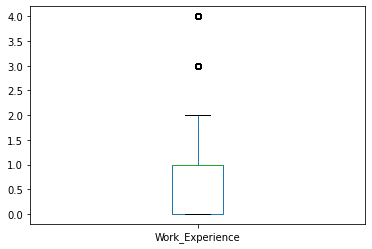

In [24]:
train.loc[train['Segmentation']==0]['Work_Experience'].plot(kind='box')

In [25]:
train.loc[train['Segmentation']==0]['Work_Experience'].mode()

0    1
dtype: int64

In [26]:
train.loc[train['Segmentation']==0]['Work_Experience'].max()

4

In [27]:
train.loc[train['Segmentation']==0]['Work_Experience'].min()

0

In [28]:
train.loc[train['Segmentation']==0]['Work_Experience'].mean()

0.8784985182746131

## Segment B

In [29]:
train.loc[train['Segmentation']==1].sample(20)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
70,0,1,27,1,Healthcare,8,Low,2,6,1
3414,1,0,31,0,Marketing,8,Low,4,6,1
5162,0,1,38,1,Artist,6,Low,1,7,1
7924,1,1,33,1,Doctor,8,High,2,6,1
2830,0,0,29,0,Healthcare,9,Low,3,3,1
6037,0,1,57,1,Doctor,5,Average,2,6,1
2210,1,1,48,1,Marketing,9,Low,1,6,1
5681,0,1,50,1,Artist,13,Low,1,6,1
2009,1,1,53,0,Entertainment,9,High,2,6,1
5298,0,1,40,1,Artist,8,Average,2,6,1


In [30]:
train.loc[(train['Segmentation']==1)&(train['Work_Experience'].isna())]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [31]:
train.loc[train['Segmentation']==1]['Work_Experience'].isna().sum()

0

In [32]:
train.loc[train['Segmentation']==1]['Work_Experience'].describe().T

count    1710.000000
mean        8.242690
std         1.995941
min         5.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        14.000000
Name: Work_Experience, dtype: float64

<AxesSubplot:>

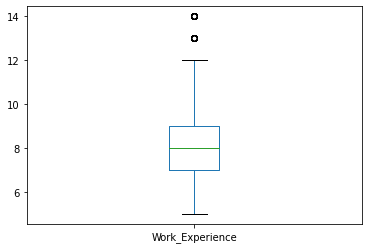

In [33]:
train.loc[train['Segmentation']==1]['Work_Experience'].plot(kind='box')

In [34]:
train.loc[train['Segmentation']==1]['Work_Experience'].mode()

0    9
dtype: int64

## Segment C

In [35]:
train.loc[train['Segmentation']==2]['Work_Experience'].isna().sum()

0

In [36]:
train.loc[train['Segmentation']==2]['Work_Experience'].describe().T

count    1696.000000
mean        0.984670
std         1.136574
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: Work_Experience, dtype: float64

<AxesSubplot:>

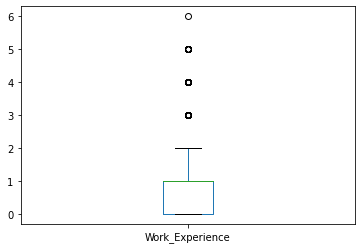

In [37]:
train.loc[train['Segmentation']==2]['Work_Experience'].plot(kind='box')

In [38]:
train.loc[train['Segmentation']==2]['Work_Experience'].mode()

0    1
dtype: int64

## Segment D

In [39]:
train.loc[train['Segmentation']==3]['Work_Experience'].isna().sum()

0

In [40]:
train.loc[train['Segmentation']==3]['Work_Experience'].describe().T

count    1619.000000
mean        1.037678
std         1.220626
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: Work_Experience, dtype: float64

<AxesSubplot:>

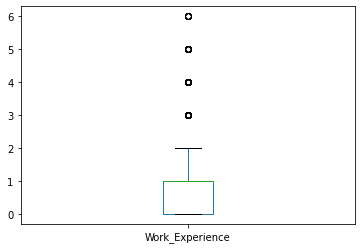

In [41]:
train.loc[train['Segmentation']==3]['Work_Experience'].plot(kind='box')

In [42]:
train.loc[train['Segmentation']==3]['Work_Experience'].mode()

0    1
dtype: int64

## Conclussions and Decision Work_Experience Missing Values

* As per the previous analysis I've decied to replace the values of work_experience according to the median per Gender, Age, Graduated.
* Statistical metrics for every Segment have been changed. I need to validate the success of this approach after running the models.  
* I will come back to this point after fullfiling the NA values for Graduated.

In [43]:
train.Work_Experience.fillna(train.groupby(['Gender', 'Age', 'Graduated'])['Work_Experience'].transform('median'), inplace=True)

In [44]:
train['Work_Experience'] = train['Work_Experience'].replace([0.5, 1.5, 2.5], [1, 2, 3])

In [45]:
train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [46]:
train.loc[train['Work_Experience'].isna()]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [47]:

train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## Conclussions and Decision Family_Size Missing Values

<AxesSubplot:>

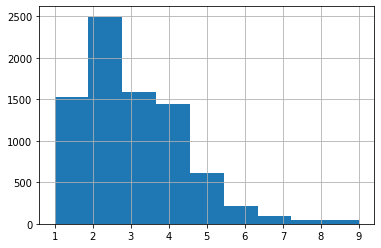

In [48]:
train['Family_Size'].hist(bins=9)


<AxesSubplot:ylabel='Density'>

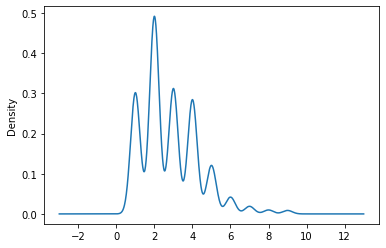

In [49]:
train['Family_Size'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

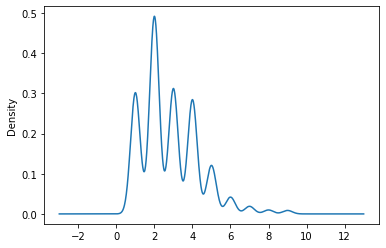

In [50]:
train['Family_Size'].plot(kind='kde') #After replacing NA 

In [51]:
train.loc[train['Segmentation']==0]['Family_Size'].isna().sum()

0

In [52]:
train.loc[train['Segmentation']==1]['Family_Size'].isna().sum()

0

In [53]:
train.loc[train['Segmentation']=='C']['Family_Size'].isna().sum()

0

In [54]:
train.loc[train['Segmentation']==2]['Family_Size'].isna().sum()

0

In [55]:
train.groupby(['Ever_Married', 'Age', 'Spending_Score'])['Family_Size'].agg('median').sample(20)

Ever_Married  Age  Spending_Score
1             80   Average           2.0
              73   High              2.0
              35   Average           3.0
              50   Low               2.0
              37   Average           2.0
0             77   Low               1.0
1             53   Average           3.0
              78   High              2.0
              59   Average           3.0
0             25   Low               3.0
              19   Low               4.0
              53   Low               1.0
              81   Low               1.0
              50   Low               1.0
1             81   High              2.0
              60   Low               2.0
              41   Average           3.0
0             20   Low               4.0
1             41   Low               2.0
              89   Average           4.0
Name: Family_Size, dtype: float64

In [56]:
train.Family_Size.fillna(train.groupby(['Ever_Married', 'Age', 'Spending_Score'])['Family_Size'].transform('median'), inplace=True)

In [57]:
train['Family_Size'] = train['Family_Size'].replace([1.5, 2.5, 3.5], [2, 3, 4])

* As per the previous analysis I've decied to replace the values of work_experience according to the median per Ever_Married, Age, Spending_Score.
* Statistical metrics for every Segment have been changed. I need to validate the success of this approach after running the models.
* Distribtuion is very simiar.
* I will come back to this point after fullfiling the NA values for the rest of the columns

In [58]:
train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## Conclussions and Decision Ever_Married Missing Values

<AxesSubplot:>

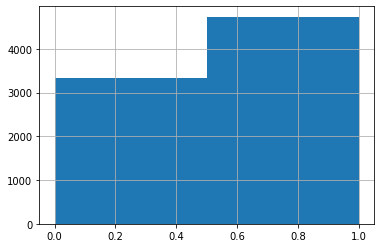

In [59]:
train['Ever_Married'].hist(bins=2)


In [60]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,Healthcare,1,Low,4,4,3
1,1,1,38,1,Engineer,3,Average,3,4,3
2,1,1,67,1,Engineer,1,Low,1,6,0
3,0,1,67,1,Lawyer,0,High,2,6,0
4,1,1,40,1,Entertainment,1,High,6,6,0
...,...,...,...,...,...,...,...,...,...,...
8057,0,0,22,0,Unknown,0,Low,7,1,2
8058,0,0,35,0,Executive,3,Low,4,4,2
8059,1,0,33,1,Healthcare,1,Low,1,6,3
8060,1,0,27,1,Healthcare,1,Low,4,6,3


In [61]:
#train['Ever_Married'] = train['Ever_Married'].map({'No':0, 'Yes':1})

In [62]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,Healthcare,1,Low,4,4,3
1,1,1,38,1,Engineer,3,Average,3,4,3
2,1,1,67,1,Engineer,1,Low,1,6,0
3,0,1,67,1,Lawyer,0,High,2,6,0
4,1,1,40,1,Entertainment,1,High,6,6,0
...,...,...,...,...,...,...,...,...,...,...
8057,0,0,22,0,Unknown,0,Low,7,1,2
8058,0,0,35,0,Executive,3,Low,4,4,2
8059,1,0,33,1,Healthcare,1,Low,1,6,3
8060,1,0,27,1,Healthcare,1,Low,4,6,3


In [63]:
train['Ever_Married']

0       0
1       1
2       1
3       1
4       1
       ..
8057    0
8058    0
8059    0
8060    0
8061    1
Name: Ever_Married, Length: 8062, dtype: int64

<AxesSubplot:ylabel='Density'>

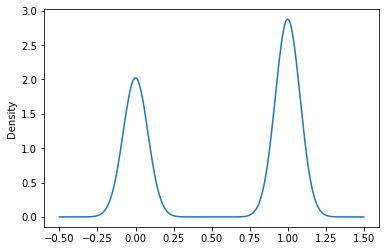

In [64]:
train['Ever_Married'].plot(kind='kde')

In [65]:
#test_ever_random.Ever_Married.value_counts(normalize=True)

In [66]:
#test_ever_random.Ever_Married.value_counts(normalize=True) #To ber run after droping NANs

In [67]:
train.Ever_Married.value_counts() #To ber run after droping NANs

1    4733
0    3329
Name: Ever_Married, dtype: int64

In [68]:
train.Ever_Married.value_counts() #To ber run after droping NANs

1    4733
0    3329
Name: Ever_Married, dtype: int64

<AxesSubplot:ylabel='Density'>

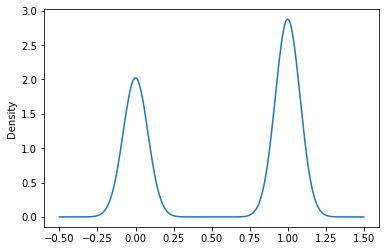

In [69]:
train['Ever_Married'].plot(kind='kde') 

<AxesSubplot:ylabel='Density'>

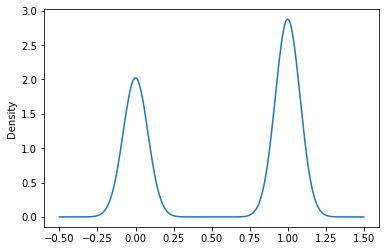

In [70]:
train['Ever_Married'].plot(kind='kde') #To be run after haandling NANs

In [71]:
train.groupby(['Family_Size', 'Age', 'Spending_Score'])['Ever_Married'].agg('median').sample(20)

Family_Size  Age  Spending_Score
2            33   Low               0.0
1            43   Low               0.0
3            52   Low               1.0
2            75   High              1.0
             22   Average           1.0
1            60   High              1.0
3            33   Low               0.0
5            48   Average           1.0
4            57   High              1.0
2            81   High              1.0
6            20   Low               0.0
             42   High              1.0
4            52   Average           1.0
5            35   Average           1.0
1            80   Low               1.0
             42   Low               0.0
2            59   High              1.0
4            58   High              1.0
1            89   High              1.0
2            46   High              1.0
Name: Ever_Married, dtype: float64

In [72]:
train.Ever_Married.fillna(train.groupby(['Family_Size', 'Age', 'Spending_Score'])['Ever_Married'].transform('median'), inplace=True)

In [73]:
train['Ever_Married'] = train['Ever_Married'].replace(0.5, 1)

* As per the previous analysis I've decied to replace the values of Ever Married according to the median per Family Size, Age, Spending_Score.
* Statistical metrics for every Segment have been changed. I need to validate the success of this approach after running the models.
* Distribtuion is very simiar.
* I will come back to this point after fullfiling the NA values for the rest of the columns

 * The below approch can be used to random assign the values to the NAN.M

```
#need to merge the na values with random values bvut index need to be sampe

rs_data.index = data[data[var].isnull()].index

#replacing with random sample
data.loc[data[var].isnull(), var+'_imputed'] = rs_data

rsdata.index = test_ever_random[test_ever_random['Ever_Married'].isnull()].index
test_ever_random.loc[test_ever_random['Ever_Married'].isnull(), 'Ever_Married'] = rsdata
test_ever_random
train.loc[train['Ever_Married'].isnull(), 'Ever_Married'] = rsdata

```

In [74]:
train.Ever_Married.unique()

array([0, 1], dtype=int64)

In [75]:
train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## Conclussions and Decision Profession Missing Values

In [76]:
train.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Unknown'],
      dtype=object)

<AxesSubplot:>

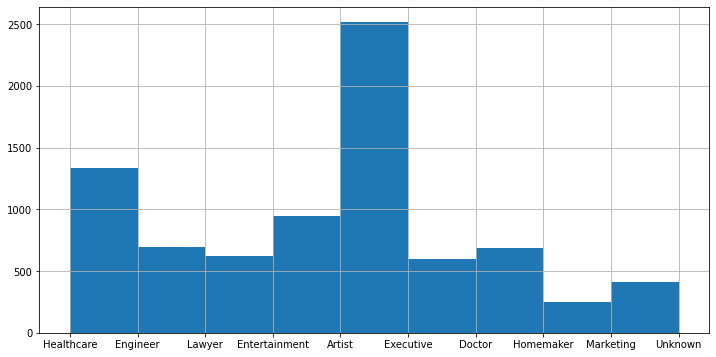

In [77]:
fig = plt.figure(figsize=(12,6))
train['Profession'].hist(bins=9)

In [78]:
train.Profession.value_counts()

Artist           2515
Healthcare       1332
Entertainment     949
Engineer          698
Doctor            688
Lawyer            623
Executive         599
Marketing         289
Homemaker         246
Unknown           123
Name: Profession, dtype: int64

In [79]:
train.Profession.value_counts(normalize=True)

Artist           0.311957
Healthcare       0.165220
Entertainment    0.117713
Engineer         0.086579
Doctor           0.085339
Lawyer           0.077276
Executive        0.074299
Marketing        0.035847
Homemaker        0.030514
Unknown          0.015257
Name: Profession, dtype: float64

In [80]:
train.Profession.value_counts() #To be run after fulfilling missing values. 

Artist           2515
Healthcare       1332
Entertainment     949
Engineer          698
Doctor            688
Lawyer            623
Executive         599
Marketing         289
Homemaker         246
Unknown           123
Name: Profession, dtype: int64

In [81]:
train.Profession.value_counts(normalize=True) #To be run after fulfilling missing values.

Artist           0.311957
Healthcare       0.165220
Entertainment    0.117713
Engineer         0.086579
Doctor           0.085339
Lawyer           0.077276
Executive        0.074299
Marketing        0.035847
Homemaker        0.030514
Unknown          0.015257
Name: Profession, dtype: float64

In [82]:
train.loc[train['Segmentation']=='A']['Profession'].isna().sum()

0

In [83]:
train.loc[(train['Segmentation']=='A')&(train['Profession'].isna())]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [84]:
train.loc[train['Segmentation']=='B']['Profession'].isna().sum()

0

In [85]:
train.loc[train['Segmentation']=='C']['Profession'].isna().sum()

0

In [86]:
train.loc[train['Segmentation']=='D']['Profession'].isna().sum()

0

<AxesSubplot:ylabel='Segmentation,Profession'>

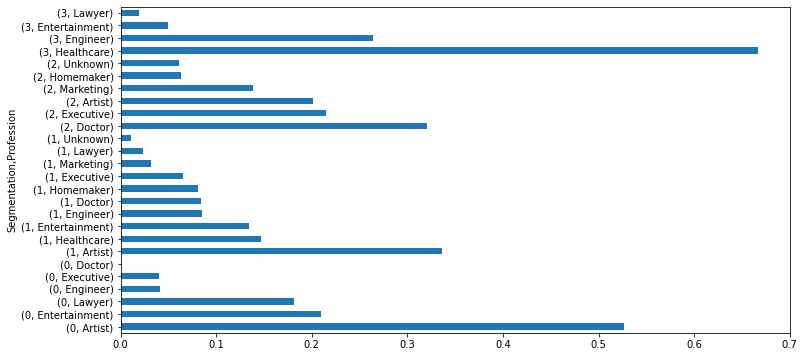

In [87]:
fig = plt.figure(figsize=(12,6))
train.groupby(train.Segmentation).Profession.value_counts(normalize=True).plot(kind='barh')

In [88]:
train['Profession'].fillna('Unknown', inplace=True)

<AxesSubplot:ylabel='Segmentation,Profession'>

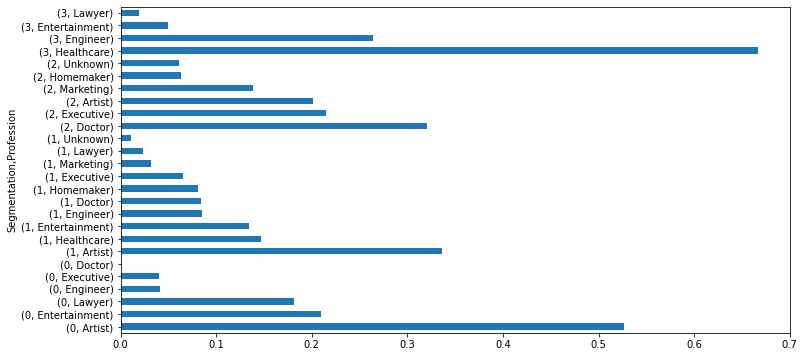

In [89]:
fig = plt.figure(figsize=(12,6))
train.groupby(train.Segmentation).Profession.value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

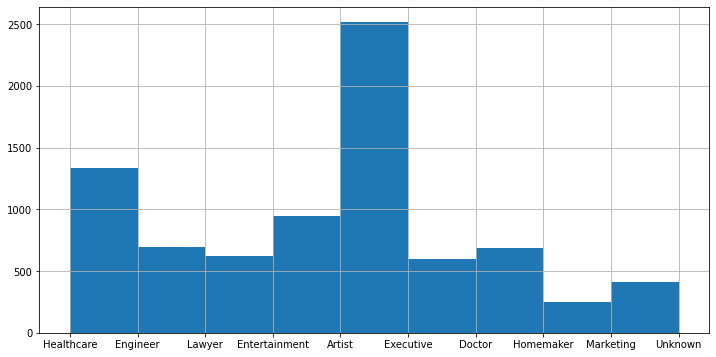

In [90]:
fig = plt.figure(figsize=(12,6))
train['Profession'].hist(bins=9)

* I've filled the missing values with a new category in Profession that it Unknown


In [91]:
train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## Conclussions and Decision Graduated Missing Values

<AxesSubplot:>

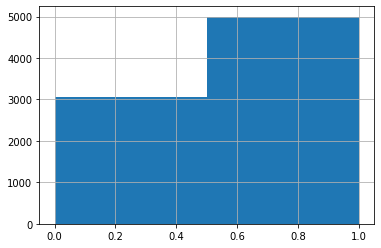

In [92]:
train['Graduated'].hist(bins=2)

In [93]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,Healthcare,1,Low,4,4,3
1,1,1,38,1,Engineer,3,Average,3,4,3
2,1,1,67,1,Engineer,1,Low,1,6,0
3,0,1,67,1,Lawyer,0,High,2,6,0
4,1,1,40,1,Entertainment,1,High,6,6,0
...,...,...,...,...,...,...,...,...,...,...
8057,0,0,22,0,Unknown,0,Low,7,1,2
8058,0,0,35,0,Executive,3,Low,4,4,2
8059,1,0,33,1,Healthcare,1,Low,1,6,3
8060,1,0,27,1,Healthcare,1,Low,4,6,3


In [94]:
#train['Graduated'] = train['Graduated'].map({'No':0, 'Yes':1})

<AxesSubplot:>

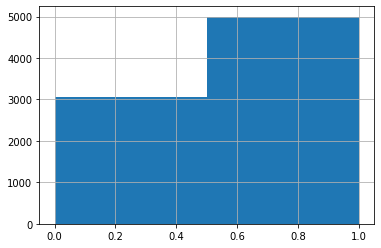

In [95]:
train['Graduated'].hist(bins=2)

<AxesSubplot:ylabel='Density'>

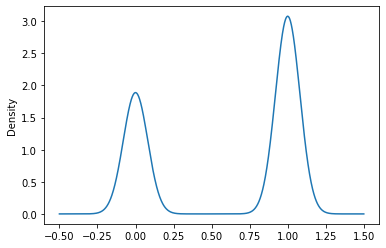

In [96]:
train['Graduated'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

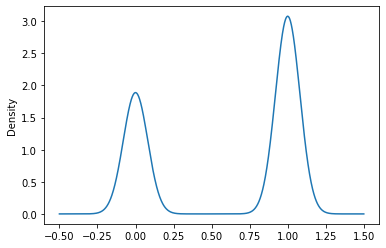

In [97]:
train['Graduated'].plot(kind='kde') #To be run after removing the Missing Values

In [98]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,Healthcare,1,Low,4,4,3
1,1,1,38,1,Engineer,3,Average,3,4,3
2,1,1,67,1,Engineer,1,Low,1,6,0
3,0,1,67,1,Lawyer,0,High,2,6,0
4,1,1,40,1,Entertainment,1,High,6,6,0
...,...,...,...,...,...,...,...,...,...,...
8057,0,0,22,0,Unknown,0,Low,7,1,2
8058,0,0,35,0,Executive,3,Low,4,4,2
8059,1,0,33,1,Healthcare,1,Low,1,6,3
8060,1,0,27,1,Healthcare,1,Low,4,6,3


In [99]:
train.groupby(['Age', 'Profession', 'Work_Experience'])['Graduated'].agg('median').sample(20)

Age  Profession     Work_Experience
28   Executive      8                  1.0
29   Healthcare     6                  1.0
48   Doctor         0                  1.0
33   Marketing      2                  0.0
38   Artist         13                 0.0
18   Healthcare     7                  0.0
81   Lawyer         8                  0.5
60   Engineer       4                  1.0
48   Artist         6                  1.0
53   Engineer       3                  0.0
87   Entertainment  0                  0.0
79   Lawyer         4                  1.0
38   Artist         7                  1.0
47   Executive      9                  1.0
57   Artist         1                  1.0
28   Healthcare     8                  1.0
73   Lawyer         1                  1.0
46   Artist         1                  1.0
40   Entertainment  8                  1.0
32   Marketing      8                  1.0
Name: Graduated, dtype: float64

In [100]:
train.pivot_table(index=train.Profession)['Graduated']

Profession
Artist           0.878330
Doctor           0.577035
Engineer         0.446991
Entertainment    0.625922
Executive        0.505843
Healthcare       0.363363
Homemaker        0.565041
Lawyer           0.617978
Marketing        0.404844
Unknown          0.455285
Name: Graduated, dtype: float64

In [101]:
train.pivot_table(index=train.Profession)['Graduated']

Profession
Artist           0.878330
Doctor           0.577035
Engineer         0.446991
Entertainment    0.625922
Executive        0.505843
Healthcare       0.363363
Homemaker        0.565041
Lawyer           0.617978
Marketing        0.404844
Unknown          0.455285
Name: Graduated, dtype: float64

In [102]:
train.pivot_table(index=train.Profession)['Graduated'] #To be run after the missing values replacement

Profession
Artist           0.878330
Doctor           0.577035
Engineer         0.446991
Entertainment    0.625922
Executive        0.505843
Healthcare       0.363363
Homemaker        0.565041
Lawyer           0.617978
Marketing        0.404844
Unknown          0.455285
Name: Graduated, dtype: float64

In [103]:
train.Graduated.fillna(train.loc[train['Profession']=='Artist']['Graduated'].apply(lambda x : 1 if random.random() > 0.88 else 0), inplace=True)

In [104]:
train.Graduated.fillna(train.loc[train['Profession']=='Doctor']['Graduated'].apply(lambda x : 1 if random.random() > 0.57 else 0), inplace=True)

In [105]:
train.Graduated.fillna(train.loc[train['Profession']=='Engineer']['Graduated'].apply(lambda x : 1 if random.random() > 0.44 else 0), inplace=True)

In [106]:
train.Graduated.fillna(train.loc[train['Profession']=='Entertainment']['Graduated'].apply(lambda x : 1 if random.random() > 0.63 else 0), inplace=True)

In [107]:
train.Graduated.fillna(train.loc[train['Profession']=='Executive']['Graduated'].apply(lambda x : 1 if random.random() > 0.50 else 0), inplace=True)

In [108]:
train.Graduated.fillna(train.loc[train['Profession']=='Healthcare']['Graduated'].apply(lambda x : 1 if random.random() > 0.36 else 0), inplace=True)

In [109]:
train.Graduated.fillna(train.loc[train['Profession']=='Homemaker']['Graduated'].apply(lambda x : 1 if random.random() > 0.56 else 0), inplace=True)

In [110]:
train.Graduated.fillna(train.loc[train['Profession']=='Lawyer']['Graduated'].apply(lambda x : 1 if random.random() > 0.62 else 0), inplace=True)

In [111]:
train.Graduated.fillna(train.loc[train['Profession']=='Marketing']['Graduated'].apply(lambda x : 1 if random.random() > 0.39 else 0), inplace=True)

In [112]:
train.Graduated.fillna(train.loc[train['Profession']=='Unknown']['Graduated'].apply(lambda x : 1 if random.random() > 0.45 else 0), inplace=True)

<AxesSubplot:>

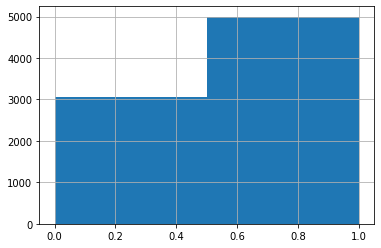

In [113]:
train['Graduated'].hist(bins=2)

* As per the previous analysis I've decied to replace the values of Graduated based in the probability of being graduated on certain profession
* Same Distribtuion.


In [114]:
train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## Conclussions and Decision Var_1 Missing Values

<AxesSubplot:>

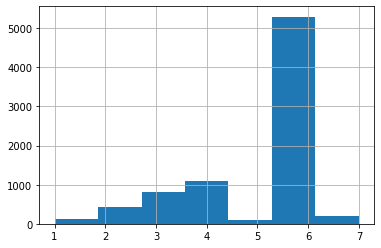

In [115]:
train['Var_1'].hist(bins=7)

In [116]:
#train['Var_1'].str.replace('Cat_', '')

In [117]:
#train['Var_1'] = train['Var_1'].str.replace('Cat_', '')
#train.Var_1.fillna(-1, inplace=True)
#train['Var_1'] = train.Var_1.astype('float')
#train['Var_1'] = train['Var_1'].replace(-1, np.nan)

In [118]:
#import math

In [119]:
train['Var_1'].notna().sum()

8062

In [120]:
#train['Var_1'] = train['Var_1'].fillna(-1)
#train['Var_1'] = train['Var_1'].astype(int)
#train['Var_1'] = train['Var_1'].replace('-1', np.nan)


In [121]:
#train['Var_1'] = train['Var_1'].replace('-1', np.nan)

In [122]:
train.groupby(['Age', 'Graduated','Family_Size'])['Var_1'].agg(pd.Series.median).sample(60)

Age  Graduated  Family_Size
69   0          4              4.0
53   1          5              5.0
38   1          1              6.0
69   0          5              3.0
63   0          4              6.0
20   0          4              6.0
76   1          1              6.0
32   0          4              6.0
20   0          7              3.0
49   0          3              4.0
20   0          8              4.0
42   1          4              6.0
29   0          3              6.0
73   1          4              6.0
38   0          3              5.0
55   0          2              6.0
19   0          4              6.0
73   0          3              6.0
43   1          5              5.5
65   0          4              4.0
27   1          2              6.0
56   1          9              6.0
50   1          2              6.0
68   0          3              6.0
19   0          5              4.0
48   0          5              5.0
83   1          1              6.0
67   1          2          

In [123]:
train.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

# Counting Var_1 in each segment
ax1 = train.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = train.pivot_table(columns='Var_1',index='Segmentation',values=train.index, aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [124]:
#train['Var_1'] = train['Var_1'].replace(-1, np.nan)

<AxesSubplot:>

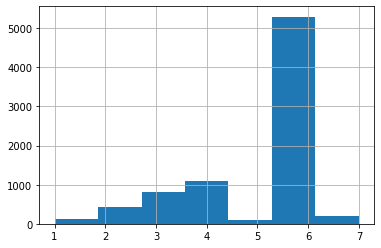

In [125]:
train['Var_1'].hist(bins=7)

In [126]:

train.Var_1.fillna(train.groupby(['Age', 'Graduated','Family_Size'])['Var_1'].transform('median'), inplace=True)
train['Var_1'] = train['Var_1'].replace(4.5, 5)
train['Var_1'] = train['Var_1'].replace(5.5, 6)

In [127]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,Healthcare,1,Low,4,4,3
1,1,1,38,1,Engineer,3,Average,3,4,3
2,1,1,67,1,Engineer,1,Low,1,6,0
3,0,1,67,1,Lawyer,0,High,2,6,0
4,1,1,40,1,Entertainment,1,High,6,6,0
...,...,...,...,...,...,...,...,...,...,...
8057,0,0,22,0,Unknown,0,Low,7,1,2
8058,0,0,35,0,Executive,3,Low,4,4,2
8059,1,0,33,1,Healthcare,1,Low,1,6,3
8060,1,0,27,1,Healthcare,1,Low,4,6,3


<AxesSubplot:>

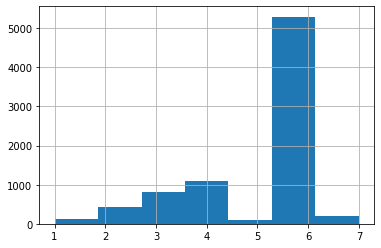

In [128]:
train['Var_1'].hist(bins=7)

# Counting Var_1 in each segment
ax1 = train.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = train.pivot_table(columns='Var_1',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [129]:
train.loc[train['Var_1'].isna()]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [130]:
train.iloc[6995]['Var_1']

4

* As per the previous analysis I've decied to replace the values of Var_1 according to the median per 'Age', 'Graduated','Family_Size'.
* VAR_1 - CAT_6 has increased in all Segments 


In [131]:
train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## Second Round of Missing Values 

In [132]:
train.Ever_Married.fillna(train.groupby(['Age', 'Spending_Score'])['Ever_Married'].transform('median'), inplace=True)

In [133]:
train.loc[train['Ever_Married'].isna()]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [134]:

train.Family_Size.fillna(train.groupby(['Ever_Married', 'Age', 'Spending_Score'])['Family_Size'].transform('median'), inplace=True)

In [135]:
train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [136]:
train.Work_Experience.fillna(train.groupby(['Gender', 'Age', 'Graduated'])['Work_Experience'].transform('median'), inplace=True)

In [137]:
train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [138]:
train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [139]:
train.loc[train['Family_Size'].isna()]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [140]:
train.loc[train['Ever_Married'].isna()]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [141]:
train.loc[train['Work_Experience'].isna()]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [142]:
train.loc[train['Var_1'].isna()]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [143]:
train.dropna(axis=0, inplace=True)

In [144]:
train.isna().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

*I've decided to remove the last rows with missing values since I couldn' assign a value based in current dataset.

## Work_Experience - Test DataSet

In [145]:
test.Work_Experience.fillna(test.groupby(['Gender', 'Age', 'Graduated'])['Work_Experience'].transform('median'), inplace=True)

In [146]:
test['Work_Experience'] = test['Work_Experience'].replace([0.5, 1.5, 2.5, 3.5, 4.5], [1, 2, 3, 4, 5])

## Family_Size - Test DataSet

In [147]:
test.Family_Size.fillna(test.groupby(['Ever_Married', 'Age', 'Spending_Score'])['Family_Size'].transform('median'), inplace=True)

In [148]:
test['Family_Size'] = test['Family_Size'].replace([1.5, 2.5, 3.5], [2, 3, 4])

## Ever_Married - Test DataSet

In [149]:
test['Ever_Married'] = test['Ever_Married'].map({'No':0, 'Yes':1})

In [150]:
test.Ever_Married.fillna(test.groupby(['Family_Size', 'Age', 'Spending_Score'])['Ever_Married'].transform('median'), inplace=True)

In [151]:
test['Ever_Married'] = test['Ever_Married'].replace(0.5, 1)

## Profession - Test DataSet

In [152]:
test['Profession'].fillna('Unknown', inplace=True)

## Gender

In [153]:
test['Gender'] = test['Gender'].map({'Male':0, 'Female':1})

## ID

In [154]:
test.drop('ID', axis=1, inplace=True)

## Graduated - Test DataSet

In [155]:
test['Graduated'] = test['Graduated'].map({'No':0, 'Yes':1})


In [156]:
test.pivot_table(index=test.Profession)['Graduated']


Profession
Artist           0.881761
Doctor           0.626556
Engineer         0.474576
Entertainment    0.612795
Executive        0.508571
Healthcare       0.335749
Homemaker        0.536585
Lawyer           0.574074
Marketing        0.372727
Unknown          0.513514
Name: Graduated, dtype: float64

In [157]:

test.Graduated.fillna(test.loc[test['Profession']=='Artist']['Graduated'].apply(lambda x : 1 if random.random() > 0.88 else 0), inplace=True)
test.Graduated.fillna(test.loc[test['Profession']=='Doctor']['Graduated'].apply(lambda x : 1 if random.random() > 0.62 else 0), inplace=True)
test.Graduated.fillna(test.loc[test['Profession']=='Engineer']['Graduated'].apply(lambda x : 1 if random.random() > 0.47 else 0), inplace=True)
test.Graduated.fillna(test.loc[test['Profession']=='Entertainment']['Graduated'].apply(lambda x : 1 if random.random() > 0.61 else 0), inplace=True)
test.Graduated.fillna(test.loc[test['Profession']=='Executive']['Graduated'].apply(lambda x : 1 if random.random() > 0.50 else 0), inplace=True)
test.Graduated.fillna(test.loc[test['Profession']=='Healthcare']['Graduated'].apply(lambda x : 1 if random.random() > 0.33 else 0), inplace=True)
test.Graduated.fillna(test.loc[test['Profession']=='Homemaker']['Graduated'].apply(lambda x : 1 if random.random() > 0.53 else 0), inplace=True)
test.Graduated.fillna(test.loc[test['Profession']=='Lawyer']['Graduated'].apply(lambda x : 1 if random.random() > 0.57 else 0), inplace=True)
test.Graduated.fillna(test.loc[test['Profession']=='Marketing']['Graduated'].apply(lambda x : 1 if random.random() > 0.37 else 0), inplace=True)
test.Graduated.fillna(test.loc[test['Profession']=='Unknown']['Graduated'].apply(lambda x : 1 if random.random() > 0.51 else 0), inplace=True)

## VAR_1 - Test DataSet

In [158]:
test['Var_1'] = test['Var_1'].str.replace('Cat_', '')
test.Var_1.fillna(-1, inplace=True)
test['Var_1'] = test.Var_1.astype('float')
test['Var_1'] = test['Var_1'].replace(-1, np.nan)
test.Var_1.fillna(test.groupby(['Age', 'Graduated','Family_Size'])['Var_1'].transform('median'), inplace=True)
test['Var_1'] = test['Var_1'].replace(4.5, 5)
test['Var_1'] = test['Var_1'].replace(5.5, 6)

## Second round of missing Values - Test DataSet

In [159]:
test.Ever_Married.fillna(test.groupby(['Age', 'Spending_Score'])['Ever_Married'].transform('median'), inplace=True)
test.Family_Size.fillna(test.groupby(['Ever_Married', 'Age', 'Spending_Score'])['Family_Size'].transform('median'), inplace=True)
test.Work_Experience.fillna(test.groupby(['Gender', 'Age', 'Graduated'])['Work_Experience'].transform('median'), inplace=True)

In [160]:
test.isna().sum().sort_values(ascending=False)

Var_1              3
Ever_Married       1
Work_Experience    1
Gender             0
Age                0
Graduated          0
Profession         0
Spending_Score     0
Family_Size        0
dtype: int64

## Finally Drop the rows with missing values

In [161]:
test.dropna(axis=0, inplace=True)

### Checking all values are correct

* train

In [162]:
print('Gender\n', train.Gender.unique(),'\n')
print('Ever_Married\n', train.Ever_Married.unique(),'\n')
print('Age\n', train.Age.unique(),'\n')
print('Graduated\n', train.Graduated.unique(),'\n')
print('Profession\n', train.Profession.unique(),'\n')
print('Work_Experience\n', train.Work_Experience.unique(),'\n')
print('Spending_Score\n', train.Spending_Score.unique(),'\n')
print('Family_Size\n', train.Family_Size.unique(),'\n')
print('Var_1\n', train.Var_1.unique(),'\n')


Gender
 [0 1] 

Ever_Married
 [0 1] 

Age
 [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88] 

Graduated
 [0 1] 

Profession
 ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' 'Unknown'] 

Work_Experience
 [ 1  3  0  4  9 12 13  5  8 14  7  2  6 10 11] 

Spending_Score
 ['Low' 'Average' 'High'] 

Family_Size
 [4 3 1 2 6 5 8 7 9] 

Var_1
 [4 6 7 3 1 2 5] 



* test

In [163]:
print('Gender\n', test.Gender.unique(),'\n')
print('Ever_Married\n', test.Ever_Married.unique(),'\n')
print('Age\n', test.Age.unique(),'\n')
print('Graduated\n', test.Graduated.unique(),'\n')
print('Profession\n', test.Profession.unique(),'\n')
print('Work_Experience\n', test.Work_Experience.unique(),'\n')
print('Spending_Score\n', test.Spending_Score.unique(),'\n')
print('Family_Size\n', test.Family_Size.unique(),'\n')
print('Var_1\n', test.Var_1.unique(),'\n')

Gender
 [1 0] 

Ever_Married
 [1. 0.] 

Age
 [36 37 69 59 19 47 61 50 22 27 18 20 45 55 88 63 42 79 35 52 29 87 89 31
 72 41 62 56 60 68 57 51 86 74 23 80 78 48 70 83 73 46 43 32 39 71 67 49
 65 33 58 30 21 26 81 28 76 85 66 53 40 25 77 75 82 84 38] 

Graduated
 [1. 0.] 

Profession
 ['Engineer' 'Healthcare' 'Unknown' 'Executive' 'Marketing' 'Doctor'
 'Artist' 'Lawyer' 'Entertainment' 'Homemaker'] 

Work_Experience
 [ 0.   8.  11.   1.   5.   2.   9.   3.   6.   7.   4.  13.  10.  12.
 14.   0.5] 

Spending_Score
 ['Low' 'Average' 'High'] 

Family_Size
 [1. 4. 2. 5. 3. 6. 8. 7. 9.] 

Var_1
 [6. 4. 3. 1. 2. 5. 7.] 



# Understanding train vs test

In [164]:
train.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [165]:
test.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [166]:
test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,1.0,36,1.0,Engineer,0.0,Low,1.0,6.0
1,0,1.0,37,1.0,Healthcare,8.0,Average,4.0,6.0
2,1,1.0,69,0.0,Unknown,0.0,Low,1.0,6.0
3,0,1.0,59,0.0,Executive,11.0,High,2.0,6.0
4,1,0.0,19,0.0,Marketing,1.0,Low,4.0,6.0
...,...,...,...,...,...,...,...,...,...
2622,0,0.0,29,0.0,Healthcare,9.0,Low,4.0,6.0
2623,1,0.0,35,1.0,Doctor,1.0,Low,1.0,6.0
2624,1,0.0,53,1.0,Entertainment,1.0,Low,2.0,6.0
2625,0,1.0,47,1.0,Executive,1.0,High,5.0,4.0


# Feature Engineering

1. Drop Columns - ID 
2. Create Numerical Categories: 
    Gender
3. Create Dummies 
    Proffesion
    Spending Score
    Var_1
4. Scaling:
    Age
    Family Size
    Work_Experience
5. Feature Selection:
    Wrappers:
        * SFS 
        * RFE
6. Modeling



## Drop columns

In [167]:
test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,1.0,36,1.0,Engineer,0.0,Low,1.0,6.0
1,0,1.0,37,1.0,Healthcare,8.0,Average,4.0,6.0
2,1,1.0,69,0.0,Unknown,0.0,Low,1.0,6.0
3,0,1.0,59,0.0,Executive,11.0,High,2.0,6.0
4,1,0.0,19,0.0,Marketing,1.0,Low,4.0,6.0
...,...,...,...,...,...,...,...,...,...
2622,0,0.0,29,0.0,Healthcare,9.0,Low,4.0,6.0
2623,1,0.0,35,1.0,Doctor,1.0,Low,1.0,6.0
2624,1,0.0,53,1.0,Entertainment,1.0,Low,2.0,6.0
2625,0,1.0,47,1.0,Executive,1.0,High,5.0,4.0


In [168]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,Healthcare,1,Low,4,4,3
1,1,1,38,1,Engineer,3,Average,3,4,3
2,1,1,67,1,Engineer,1,Low,1,6,0
3,0,1,67,1,Lawyer,0,High,2,6,0
4,1,1,40,1,Entertainment,1,High,6,6,0
...,...,...,...,...,...,...,...,...,...,...
8057,0,0,22,0,Unknown,0,Low,7,1,2
8058,0,0,35,0,Executive,3,Low,4,4,2
8059,1,0,33,1,Healthcare,1,Low,1,6,3
8060,1,0,27,1,Healthcare,1,Low,4,6,3


In [169]:
#test.drop('ID', axis=1, inplace=True)
#train.drop('ID', axis=1, inplace=True)

In [170]:
#train['Gender'] = train['Gender'].map({'Male' : 0, 'Female': 1})

In [171]:
#test['Gender'] = test['Gender'].map({'Male' : 0, 'Female': 1})

In [172]:
train[['Ever_Married', 'Graduated', 'Work_Experience', 'Family_Size', 'Var_1']] = train[['Ever_Married', 'Graduated', 'Work_Experience', 'Family_Size', 'Var_1']].astype('int64')

In [173]:
test[['Ever_Married', 'Graduated', 'Work_Experience', 'Family_Size', 'Var_1']] = test[['Ever_Married', 'Graduated', 'Work_Experience', 'Family_Size', 'Var_1']].astype('int64')

In [174]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,Healthcare,1,Low,4,4,3
1,1,1,38,1,Engineer,3,Average,3,4,3
2,1,1,67,1,Engineer,1,Low,1,6,0
3,0,1,67,1,Lawyer,0,High,2,6,0
4,1,1,40,1,Entertainment,1,High,6,6,0
...,...,...,...,...,...,...,...,...,...,...
8057,0,0,22,0,Unknown,0,Low,7,1,2
8058,0,0,35,0,Executive,3,Low,4,4,2
8059,1,0,33,1,Healthcare,1,Low,1,6,3
8060,1,0,27,1,Healthcare,1,Low,4,6,3


In [175]:
#train.to_csv('./Data\Train_normalize.csv')
#test.to_csv('./Data\Test_normalize.csv')

## Create Dummies - Profession - Spending_Score - Var_1

In [176]:
profesion = pd.get_dummies(train.Profession,drop_first=True)
spending =pd.get_dummies(train.Spending_Score,drop_first=True)
var =pd.get_dummies(train.Var_1,drop_first=True)
train=pd.concat([profesion, spending, var, train],axis=1)
train.head()
train.drop(['Profession', 'Spending_Score', 'Var_1'], axis = 1, inplace = True)
train.head()

,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Unknown,High,...,5,6,7,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,22,0,1,4,3
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,38,1,3,3,3
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,67,1,1,1,0
3,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,67,1,0,2,0
4,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,1,40,1,1,6,0


In [177]:
profesion = pd.get_dummies(test.Profession,drop_first=True)
spending =pd.get_dummies(test.Spending_Score,drop_first=True)
var =pd.get_dummies(test.Var_1,drop_first=True)
test=pd.concat([profesion, spending, var, test],axis=1)
test.head()
test.drop(['Profession', 'Spending_Score', 'Var_1'], axis = 1, inplace = True)
test.head()

,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Unknown,High,...,4,5,6,7,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,36,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,37,1,8,4
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,69,0,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,59,0,11,2
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,19,0,1,4


## Scaling Values -   Age -  Family Size - Work_Experience

In [178]:
num_vars = ['Age', 'Family_Size', 'Work_Experience']

In [179]:
from sklearn.preprocessing import StandardScaler


In [180]:
scaler = StandardScaler()
train[num_vars] = scaler.fit_transform(train[num_vars])
test[num_vars] = scaler.fit_transform(test[num_vars])

In [181]:
train.columns

Index([         'Doctor',        'Engineer',   'Entertainment',
             'Executive',      'Healthcare',       'Homemaker',
                'Lawyer',       'Marketing',         'Unknown',
                  'High',             'Low',                 2,
                       3,                 4,                 5,
                       6,                 7,          'Gender',
          'Ever_Married',             'Age',       'Graduated',
       'Work_Experience',     'Family_Size',    'Segmentation'],
      dtype='object')

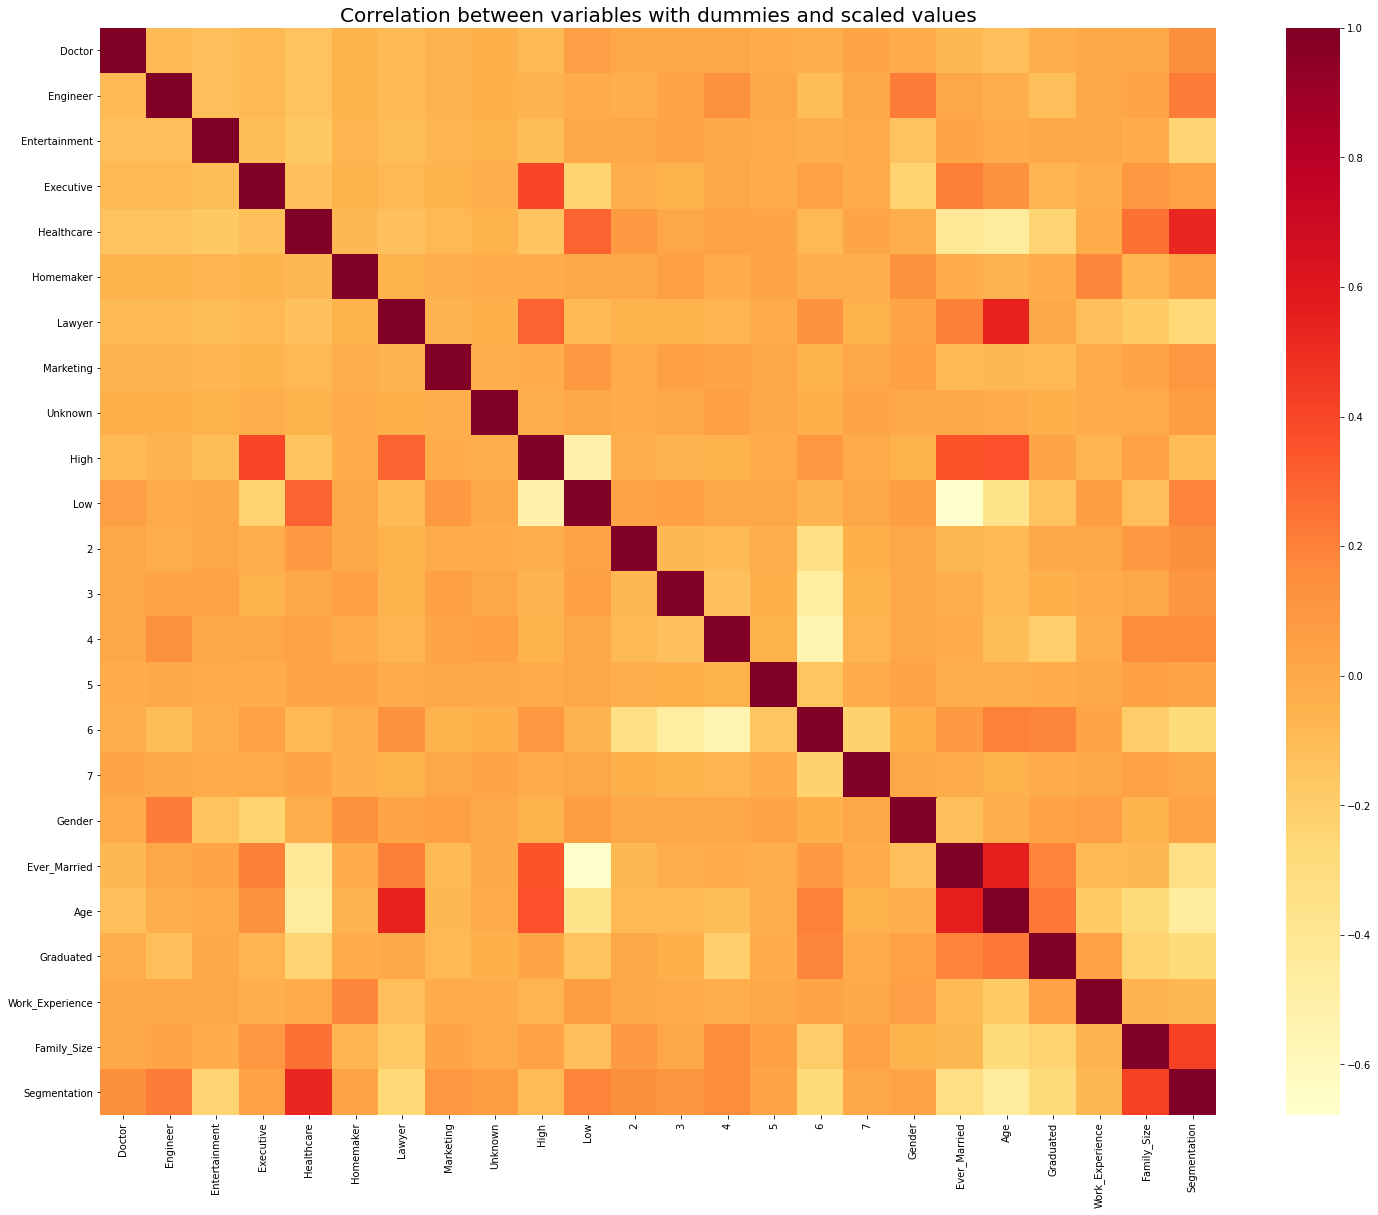

In [182]:
plt.figure(figsize=(25, 20))
sns.heatmap(train.corr(),cmap='YlOrRd')
plt.title("Correlation between variables with dummies and scaled values", size=20)
plt.show()

In [183]:
train_pca = train.copy()

In [184]:
test_pca = test.copy()

In [185]:
train_svc = train.copy()
test_svc = test.copy()
train_lgbm = train.copy()
test_lgbm = test.copy()

## Dive Train in X_train, X_test, y_train and y_test 

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Segmentation', axis=1), train.Segmentation, 
                                                    test_size=1/3, 
                                                    random_state=42,
                                                    stratify=train.Segmentation)

In [187]:
train.columns


Index([         'Doctor',        'Engineer',   'Entertainment',
             'Executive',      'Healthcare',       'Homemaker',
                'Lawyer',       'Marketing',         'Unknown',
                  'High',             'Low',                 2,
                       3,                 4,                 5,
                       6,                 7,          'Gender',
          'Ever_Married',             'Age',       'Graduated',
       'Work_Experience',     'Family_Size',    'Segmentation'],
      dtype='object')

In [188]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Segmentation', axis=1), train.Segmentation, 
                                                    test_size=1/3, 
                                                    random_state=42,
                                                    stratify=train.Segmentation)

In [189]:
X_train

,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Unknown,High,...,4,5,6,7,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size
2658,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.331507,1,-0.763681,-1.207628
7914,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,1,1,2.726859,0,-0.457571,-0.548461
984,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,-1.345238,0,-0.763681,1.429041
6510,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,-0.027795,1,1.991312,-0.548461
2638,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.331507,1,-0.763681,-0.548461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,-0.806284,1,-0.457571,1.429041
7579,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1.050113,0,-0.457571,-0.548461
7783,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,-0.087679,1,1.685202,-0.548461
1847,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,-0.506865,1,1.991312,-0.548461


In [190]:
X_test

,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Unknown,High,...,4,5,6,7,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size
1188,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0.211740,1,-0.151460,-1.207628
2162,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,-1.465006,0,-0.763681,0.769873
674,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,-1.045820,0,-0.763681,-0.548461
4193,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,-0.746401,1,1.991312,0.110706
3384,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.750694,1,-0.763681,-0.548461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,1,-0.387098,0,-0.763681,0.769873
98,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.870462,1,-0.457571,-0.548461
2010,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,-0.746401,0,1.991312,0.769873
6011,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,1,1,0.870462,0,-0.763681,0.769873


In [191]:
y_train

2658    0
7914    0
984     3
6510    1
2638    0
       ..
1927    3
7579    0
7783    1
1847    1
911     1
Name: Segmentation, Length: 5374, dtype: int64

In [192]:
y_test

1188    2
2162    3
674     2
4193    1
3384    0
       ..
1983    2
98      2
2010    1
6011    0
3300    0
Name: Segmentation, Length: 2688, dtype: int64

## Logistic Regression

In [193]:
model1 = LogisticRegression(max_iter = 1e5,  multi_class='multinomial')
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
display(confusion_matrix(y_test, y_pred1))

print("Accuracy : ",accuracy_score(y_test, y_pred1)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred1, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred1,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred1,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred1))

array([[1002,    2,    5,    4],
       [   2,  561,    5,    2],
       [   4,    0,  561,    0],
       [   8,    1,    0,  531]], dtype=int64)

Accuracy :  0.9877232142857143
Precision Score :  0.9880537510740236
Recall Score :  0.9874013446220711
F1 Score :  0.9877112821481233
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1013
           1       0.99      0.98      0.99       570
           2       0.98      0.99      0.99       565
           3       0.99      0.98      0.99       540

    accuracy                           0.99      2688
   macro avg       0.99      0.99      0.99      2688
weighted avg       0.99      0.99      0.99      2688



In [194]:
test1 = np.transpose(model1.coef_)

In [195]:
test1 = pd.DataFrame(test1)

In [196]:
test1

,0,1,2,3
0,-4.623446,0.206456,4.719781,-0.302791
1,-2.417084,-0.586752,-2.141243,5.145079
2,1.668960,0.987636,-4.043356,1.386760
3,-2.030829,0.185265,2.531638,-0.686075
4,-4.420061,-0.973925,-1.441302,6.835288
5,-3.571446,-0.983789,4.620676,-0.065441
6,-0.280541,0.050876,-2.378898,2.608563
7,-4.104365,-0.655599,4.913924,-0.153960
8,-3.804612,-0.603207,4.495868,-0.088048
9,-0.066578,0.132375,0.023888,-0.089685


In [197]:
test2 = pd.DataFrame(X_train.columns)

In [198]:
coef = pd.concat([test2,test1], axis=1)

In [199]:
 coef[0].columns

Int64Index([0, 0], dtype='int64')

In [200]:
cols = []
count = 0
for column in coef.columns:
    if column == 0:
        cols.append(f'0_{count}')
        count+=1
        continue
    cols.append(column)
coef.columns = cols
    

In [201]:
coef.rename(columns = {'0_0': 'Feature', '0_1': 'Cluster_0', 1:'Cluster_1', 2:'Cluster_2', 3:'Cluster_3'}, inplace = True)

In [202]:
coef[['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3']] = coef[['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3']].round(2)

In [203]:
coef.sort_values(by='Cluster_0')

,Feature,Cluster_0,Cluster_1,Cluster_2,Cluster_3
0,Doctor,-4.62,0.21,4.72,-0.30
4,Healthcare,-4.42,-0.97,-1.44,6.84
7,Marketing,-4.10,-0.66,4.91,-0.15
8,Unknown,-3.80,-0.60,4.50,-0.09
5,Homemaker,-3.57,-0.98,4.62,-0.07
21,Work_Experience,-3.46,8.49,-2.61,-2.42
1,Engineer,-2.42,-0.59,-2.14,5.15
22,Family_Size,-2.06,-0.13,1.15,1.04
3,Executive,-2.03,0.19,2.53,-0.69
11,2,-0.57,-0.50,0.94,0.14


In [204]:
X_train

,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Unknown,High,...,4,5,6,7,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size
2658,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.331507,1,-0.763681,-1.207628
7914,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,1,1,2.726859,0,-0.457571,-0.548461
984,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,-1.345238,0,-0.763681,1.429041
6510,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,-0.027795,1,1.991312,-0.548461
2638,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.331507,1,-0.763681,-0.548461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,-0.806284,1,-0.457571,1.429041
7579,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1.050113,0,-0.457571,-0.548461
7783,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,-0.087679,1,1.685202,-0.548461
1847,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,-0.506865,1,1.991312,-0.548461


In [205]:
model1.predict(test)

array([0, 1, 2, ..., 0, 2, 1], dtype=int64)

## KNN

In [206]:
model2 = KNeighborsClassifier(5)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
display(confusion_matrix(y_test, y_pred2))

print("Accuracy : ",accuracy_score(y_test, y_pred2)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred2, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred2,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred2,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred2))

array([[997,   4,   8,   4],
       [  7, 552,   8,   3],
       [ 84,   1, 474,   6],
       [ 40,   5,  11, 484]], dtype=int64)

Accuracy :  0.9326636904761905
Precision Score :  0.9465056241755347
Recall Score :  0.9219651831815272
F1 Score :  0.932343309563146
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1013
           1       0.98      0.97      0.98       570
           2       0.95      0.84      0.89       565
           3       0.97      0.90      0.93       540

    accuracy                           0.93      2688
   macro avg       0.95      0.92      0.93      2688
weighted avg       0.94      0.93      0.93      2688



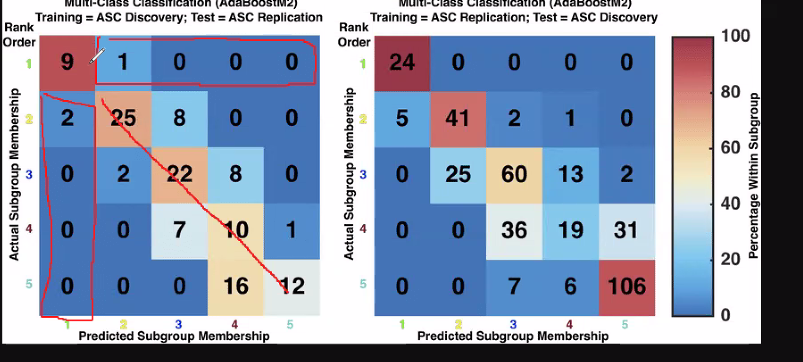

In [207]:
test['Prediction'] = model2.predict(test)

In [208]:
test.Prediction.value_counts()

0    1074
1     546
2     508
3     494
Name: Prediction, dtype: int64

In [209]:
model3 = KNeighborsClassifier(5, weights='distance')
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
display(confusion_matrix(y_test, y_pred3))

print("Accuracy : ",accuracy_score(y_test, y_pred3)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred3, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred3,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred3,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred3))

array([[998,   5,   5,   5],
       [  7, 552,   9,   2],
       [ 73,   2, 484,   6],
       [ 33,   5,   8, 494]], dtype=int64)

Accuracy :  0.9404761904761905
Precision Score :  0.9519734866819067
Recall Score :  0.9312663832800175
F1 Score :  0.9401895093966445
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1013
           1       0.98      0.97      0.97       570
           2       0.96      0.86      0.90       565
           3       0.97      0.91      0.94       540

    accuracy                           0.94      2688
   macro avg       0.95      0.93      0.94      2688
weighted avg       0.94      0.94      0.94      2688



## SVC

In [210]:
model4 = SVC(kernel = 'linear')
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
display(confusion_matrix(y_test, y_pred4))

print("Accuracy : ",accuracy_score(y_test, y_pred4)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred4, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred4,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred4,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred4))

array([[1003,    0,    5,    5],
       [   0,  564,    5,    1],
       [   5,    0,  560,    0],
       [   8,    5,    0,  527]], dtype=int64)

Accuracy :  0.9873511904761905
Precision Score :  0.9874041207229014
Recall Score :  0.9866695960755959
F1 Score :  0.9870208876840685
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1013
           1       0.99      0.99      0.99       570
           2       0.98      0.99      0.99       565
           3       0.99      0.98      0.98       540

    accuracy                           0.99      2688
   macro avg       0.99      0.99      0.99      2688
weighted avg       0.99      0.99      0.99      2688



In [211]:
model5 = SVC()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
display(confusion_matrix(y_test, y_pred5))

print("Accuracy : ",accuracy_score(y_test, y_pred5)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred5, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred5,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred5,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred5))

array([[995,   1,   7,  10],
       [  0, 566,   2,   2],
       [ 13,   5, 547,   0],
       [ 14,   4,   0, 522]], dtype=int64)

Accuracy :  0.9784226190476191
Precision Score :  0.9793902854310144
Recall Score :  0.9775054281914678
F1 Score :  0.9784129935707973
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1013
           1       0.98      0.99      0.99       570
           2       0.98      0.97      0.98       565
           3       0.98      0.97      0.97       540

    accuracy                           0.98      2688
   macro avg       0.98      0.98      0.98      2688
weighted avg       0.98      0.98      0.98      2688



## Gaussian

In [212]:
model6 = GaussianNB()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
display(confusion_matrix(y_test, y_pred6))

print("Accuracy : ",accuracy_score(y_test, y_pred6)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred6, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred6,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred6,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred6))

array([[631,   0,  36, 346],
       [ 18,  31, 143, 378],
       [ 11,   0, 457,  97],
       [ 14,   0,   0, 526]], dtype=int64)

Accuracy :  0.6119791666666666
Precision Score :  0.7613131602920464
Recall Score :  0.6150529667480475
F1 Score :  0.5424415122539314
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.62      0.75      1013
           1       1.00      0.05      0.10       570
           2       0.72      0.81      0.76       565
           3       0.39      0.97      0.56       540

    accuracy                           0.61      2688
   macro avg       0.76      0.62      0.54      2688
weighted avg       0.79      0.61      0.58      2688



## Decision Tree

In [213]:
model7 = DecisionTreeClassifier()
model7.fit(X_train, y_train)
y_pred7= model7.predict(X_test)
display(confusion_matrix(y_test, y_pred7))

print("Accuracy : ",accuracy_score(y_test, y_pred7)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred7, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred7,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred7,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred7))

array([[991,   0,   7,  15],
       [  0, 566,   0,   4],
       [  2,   0, 563,   0],
       [  5,   4,   0, 531]], dtype=int64)

Accuracy :  0.9862351190476191
Precision Score :  0.9847855679460995
Recall Score :  0.9877645740446391
F1 Score :  0.9862360452753987
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1013
           1       0.99      0.99      0.99       570
           2       0.99      1.00      0.99       565
           3       0.97      0.98      0.97       540

    accuracy                           0.99      2688
   macro avg       0.98      0.99      0.99      2688
weighted avg       0.99      0.99      0.99      2688



## Random Forest

In [214]:
model8 = RandomForestClassifier()
model8.fit(X_train, y_train)
y_pred8= model8.predict(X_test)
display(confusion_matrix(y_test, y_pred8))

print("Accuracy : ",accuracy_score(y_test, y_pred8)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred8, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred8,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred8,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred8))

array([[997,   0,   6,  10],
       [  0, 569,   1,   0],
       [  4,   5, 556,   0],
       [  7,   6,   0, 527]], dtype=int64)

Accuracy :  0.9854910714285714
Precision Score :  0.9847666044691803
Recall Score :  0.9856119167805197
F1 Score :  0.9851663699657094
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1013
           1       0.98      1.00      0.99       570
           2       0.99      0.98      0.99       565
           3       0.98      0.98      0.98       540

    accuracy                           0.99      2688
   macro avg       0.98      0.99      0.99      2688
weighted avg       0.99      0.99      0.99      2688



<AxesSubplot:>

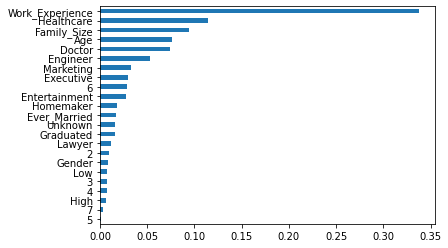

In [215]:
pd.Series(model8.feature_importances_, index=X_train.columns).sort_values().plot.barh()

## AdaBoost

In [216]:

model9 = AdaBoostClassifier()
model9.fit(X_train, y_train)
y_pred9= model9.predict(X_test)
display(confusion_matrix(y_test, y_pred9))

print("Accuracy : ",accuracy_score(y_test, y_pred9)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred9, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred9,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred9,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred9))

array([[438,   0, 564,  11],
       [  0, 566,   4,   0],
       [  0,   5, 560,   0],
       [161,   6,   0, 373]], dtype=int64)

Accuracy :  0.7206101190476191
Precision Score :  0.7949906601055601
Recall Score :  0.7768131778555365
F1 Score :  0.7498133949961208
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.43      0.54      1013
           1       0.98      0.99      0.99       570
           2       0.50      0.99      0.66       565
           3       0.97      0.69      0.81       540

    accuracy                           0.72      2688
   macro avg       0.79      0.78      0.75      2688
weighted avg       0.78      0.72      0.72      2688



## XGBOOST

In [217]:
model10 = XGBClassifier()
model10.fit(X_train, y_train)
y_pred10= model10.predict(X_test)
display(confusion_matrix(y_test, y_pred10))

print("Accuracy : ",accuracy_score(y_test, y_pred10)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred10, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred10,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred10,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred10))

[14:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\israe\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


array([[997,   0,   5,  11],
       [  0, 565,   3,   2],
       [  0,   1, 564,   0],
       [  5,   4,   0, 531]], dtype=int64)

Accuracy :  0.9884672619047619
Precision Score :  0.9870887443514539
Recall Score :  0.9892492056763089
F1 Score :  0.9881488659281998
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1013
           1       0.99      0.99      0.99       570
           2       0.99      1.00      0.99       565
           3       0.98      0.98      0.98       540

    accuracy                           0.99      2688
   macro avg       0.99      0.99      0.99      2688
weighted avg       0.99      0.99      0.99      2688



## LightGBM

In [218]:
model11 = LGBMClassifier()
model11.fit(X_train, y_train)
y_pred11= model11.predict(X_test)
display(confusion_matrix(y_test, y_pred11))

print("Accuracy : ",accuracy_score(y_test, y_pred11)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred11, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred11,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred11,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred11))


array([[999,   0,   4,  10],
       [  0, 566,   2,   2],
       [  1,   0, 564,   0],
       [  5,   2,   0, 533]], dtype=int64)

Accuracy :  0.9903273809523809
Precision Score :  0.9894910148930947
Recall Score :  0.9911073115090602
F1 Score :  0.9902844669684315
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1013
           1       1.00      0.99      0.99       570
           2       0.99      1.00      0.99       565
           3       0.98      0.99      0.98       540

    accuracy                           0.99      2688
   macro avg       0.99      0.99      0.99      2688
weighted avg       0.99      0.99      0.99      2688



## CatBoost - Becareful with Trues and False they are consider categories

In [219]:
model12 = CatBoostClassifier()
model12.fit(X_train, y_train)
y_pred12= model12.predict(X_test)
display(confusion_matrix(y_test, y_pred12))

print("Accuracy : ",accuracy_score(y_test, y_pred12)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred12, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred12,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred12,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred12))

Learning rate set to 0.086212
0:	learn: 1.2157977	total: 147ms	remaining: 2m 27s
1:	learn: 1.0903132	total: 153ms	remaining: 1m 16s
2:	learn: 0.9839840	total: 158ms	remaining: 52.5s
3:	learn: 0.9024620	total: 170ms	remaining: 42.3s
4:	learn: 0.8269293	total: 176ms	remaining: 35s
5:	learn: 0.7720118	total: 182ms	remaining: 30.2s
6:	learn: 0.7203769	total: 189ms	remaining: 26.8s
7:	learn: 0.6703550	total: 197ms	remaining: 24.4s
8:	learn: 0.6285602	total: 205ms	remaining: 22.5s
9:	learn: 0.5891103	total: 210ms	remaining: 20.8s
10:	learn: 0.5585628	total: 215ms	remaining: 19.4s
11:	learn: 0.5278639	total: 222ms	remaining: 18.3s
12:	learn: 0.5010436	total: 227ms	remaining: 17.2s
13:	learn: 0.4768077	total: 234ms	remaining: 16.4s
14:	learn: 0.4539630	total: 244ms	remaining: 16.1s
15:	learn: 0.4325976	total: 250ms	remaining: 15.4s
16:	learn: 0.4119963	total: 255ms	remaining: 14.8s
17:	learn: 0.3933458	total: 261ms	remaining: 14.3s
18:	learn: 0.3767353	total: 270ms	remaining: 13.9s
19:	learn: 

173:	learn: 0.0529207	total: 1.38s	remaining: 6.55s
174:	learn: 0.0528294	total: 1.39s	remaining: 6.53s
175:	learn: 0.0525502	total: 1.4s	remaining: 6.54s
176:	learn: 0.0522515	total: 1.4s	remaining: 6.52s
177:	learn: 0.0518738	total: 1.41s	remaining: 6.51s
178:	learn: 0.0515255	total: 1.42s	remaining: 6.49s
179:	learn: 0.0512507	total: 1.42s	remaining: 6.48s
180:	learn: 0.0509949	total: 1.43s	remaining: 6.46s
181:	learn: 0.0508379	total: 1.43s	remaining: 6.44s
182:	learn: 0.0507559	total: 1.44s	remaining: 6.43s
183:	learn: 0.0505295	total: 1.44s	remaining: 6.41s
184:	learn: 0.0504201	total: 1.45s	remaining: 6.39s
185:	learn: 0.0500327	total: 1.46s	remaining: 6.37s
186:	learn: 0.0498613	total: 1.46s	remaining: 6.36s
187:	learn: 0.0495655	total: 1.47s	remaining: 6.35s
188:	learn: 0.0494316	total: 1.48s	remaining: 6.34s
189:	learn: 0.0492833	total: 1.48s	remaining: 6.32s
190:	learn: 0.0490802	total: 1.49s	remaining: 6.3s
191:	learn: 0.0489036	total: 1.5s	remaining: 6.31s
192:	learn: 0.04

345:	learn: 0.0279895	total: 2.54s	remaining: 4.81s
346:	learn: 0.0279169	total: 2.55s	remaining: 4.79s
347:	learn: 0.0277271	total: 2.55s	remaining: 4.79s
348:	learn: 0.0276695	total: 2.56s	remaining: 4.77s
349:	learn: 0.0275577	total: 2.56s	remaining: 4.76s
350:	learn: 0.0274709	total: 2.57s	remaining: 4.76s
351:	learn: 0.0274161	total: 2.58s	remaining: 4.75s
352:	learn: 0.0273739	total: 2.59s	remaining: 4.74s
353:	learn: 0.0272833	total: 2.59s	remaining: 4.73s
354:	learn: 0.0271810	total: 2.6s	remaining: 4.73s
355:	learn: 0.0271334	total: 2.61s	remaining: 4.72s
356:	learn: 0.0270958	total: 2.62s	remaining: 4.72s
357:	learn: 0.0270190	total: 2.62s	remaining: 4.71s
358:	learn: 0.0269701	total: 2.63s	remaining: 4.7s
359:	learn: 0.0269238	total: 2.64s	remaining: 4.7s
360:	learn: 0.0268377	total: 2.65s	remaining: 4.69s
361:	learn: 0.0267811	total: 2.65s	remaining: 4.68s
362:	learn: 0.0266900	total: 2.66s	remaining: 4.67s
363:	learn: 0.0266450	total: 2.67s	remaining: 4.66s
364:	learn: 0.0

505:	learn: 0.0190550	total: 3.75s	remaining: 3.66s
506:	learn: 0.0189965	total: 3.76s	remaining: 3.65s
507:	learn: 0.0189681	total: 3.76s	remaining: 3.65s
508:	learn: 0.0189325	total: 3.77s	remaining: 3.63s
509:	learn: 0.0188794	total: 3.77s	remaining: 3.63s
510:	learn: 0.0188370	total: 3.79s	remaining: 3.63s
511:	learn: 0.0187816	total: 3.8s	remaining: 3.62s
512:	learn: 0.0187196	total: 3.81s	remaining: 3.61s
513:	learn: 0.0186956	total: 3.81s	remaining: 3.6s
514:	learn: 0.0186702	total: 3.82s	remaining: 3.6s
515:	learn: 0.0186443	total: 3.83s	remaining: 3.59s
516:	learn: 0.0185962	total: 3.84s	remaining: 3.59s
517:	learn: 0.0185513	total: 3.85s	remaining: 3.58s
518:	learn: 0.0185067	total: 3.85s	remaining: 3.57s
519:	learn: 0.0184751	total: 3.86s	remaining: 3.56s
520:	learn: 0.0184589	total: 3.86s	remaining: 3.55s
521:	learn: 0.0183724	total: 3.88s	remaining: 3.56s
522:	learn: 0.0183489	total: 3.89s	remaining: 3.55s
523:	learn: 0.0183193	total: 3.9s	remaining: 3.54s
524:	learn: 0.01

673:	learn: 0.0137362	total: 5.13s	remaining: 2.48s
674:	learn: 0.0137221	total: 5.13s	remaining: 2.47s
675:	learn: 0.0137126	total: 5.14s	remaining: 2.46s
676:	learn: 0.0136999	total: 5.15s	remaining: 2.46s
677:	learn: 0.0136780	total: 5.15s	remaining: 2.45s
678:	learn: 0.0136476	total: 5.17s	remaining: 2.44s
679:	learn: 0.0136381	total: 5.17s	remaining: 2.43s
680:	learn: 0.0136153	total: 5.18s	remaining: 2.42s
681:	learn: 0.0135907	total: 5.18s	remaining: 2.42s
682:	learn: 0.0135677	total: 5.19s	remaining: 2.41s
683:	learn: 0.0135188	total: 5.2s	remaining: 2.4s
684:	learn: 0.0135065	total: 5.2s	remaining: 2.39s
685:	learn: 0.0134697	total: 5.21s	remaining: 2.38s
686:	learn: 0.0134588	total: 5.22s	remaining: 2.38s
687:	learn: 0.0134480	total: 5.22s	remaining: 2.37s
688:	learn: 0.0134241	total: 5.23s	remaining: 2.36s
689:	learn: 0.0133926	total: 5.24s	remaining: 2.35s
690:	learn: 0.0133758	total: 5.25s	remaining: 2.35s
691:	learn: 0.0133208	total: 5.25s	remaining: 2.34s
692:	learn: 0.0

849:	learn: 0.0102730	total: 6.47s	remaining: 1.14s
850:	learn: 0.0102622	total: 6.47s	remaining: 1.13s
851:	learn: 0.0102379	total: 6.48s	remaining: 1.13s
852:	learn: 0.0102141	total: 6.49s	remaining: 1.12s
853:	learn: 0.0102043	total: 6.5s	remaining: 1.11s
854:	learn: 0.0101928	total: 6.5s	remaining: 1.1s
855:	learn: 0.0101773	total: 6.51s	remaining: 1.09s
856:	learn: 0.0101532	total: 6.52s	remaining: 1.09s
857:	learn: 0.0101462	total: 6.52s	remaining: 1.08s
858:	learn: 0.0101238	total: 6.53s	remaining: 1.07s
859:	learn: 0.0101125	total: 6.54s	remaining: 1.06s
860:	learn: 0.0100865	total: 6.55s	remaining: 1.06s
861:	learn: 0.0100797	total: 6.55s	remaining: 1.05s
862:	learn: 0.0100700	total: 6.56s	remaining: 1.04s
863:	learn: 0.0100561	total: 6.56s	remaining: 1.03s
864:	learn: 0.0100409	total: 6.58s	remaining: 1.03s
865:	learn: 0.0100326	total: 6.59s	remaining: 1.02s
866:	learn: 0.0100186	total: 6.61s	remaining: 1.01s
867:	learn: 0.0100107	total: 6.61s	remaining: 1s
868:	learn: 0.0100

array([[999,   0,   5,   9],
       [  0, 568,   1,   1],
       [  2,   4, 559,   0],
       [  5,   4,   0, 531]], dtype=int64)

Accuracy :  0.9884672619047619
Precision Score :  0.9875122758081616
Recall Score :  0.9888461891850594
F1 Score :  0.9881692551379755
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1013
           1       0.99      1.00      0.99       570
           2       0.99      0.99      0.99       565
           3       0.98      0.98      0.98       540

    accuracy                           0.99      2688
   macro avg       0.99      0.99      0.99      2688
weighted avg       0.99      0.99      0.99      2688



# Evaluation

In [220]:
a, p, r, f = [],[],[],[]

In [221]:
for model in [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12]:
    a.append(accuracy_score(y_test, model.predict(X_test)))
    p.append(precision_score(y_test, model.predict(X_test),average='macro'))
    r.append(recall_score(y_test, model.predict(X_test),average='macro'))
    f.append(f1_score(y_test, model.predict(X_test),average='macro'))

In [222]:
pd.DataFrame([a, p, r, f], columns = ['LR', 'KNN', 'KNNw', 'SVCl', 'SVC', 'NB', 'DT', 'RF', 'Ada', 'XGB', 'LGBM', 'Cat']).T.sort_values(by=2, ascending=False).rename(columns={0:'Accuaracy', 1: 'Precision', 2:'Recall', 3:'F1'})

,Accuaracy,Precision,Recall,F1
LGBM,0.990327,0.989491,0.991107,0.990284
XGB,0.988467,0.987089,0.989249,0.988149
Cat,0.988467,0.987512,0.988846,0.988169
DT,0.986235,0.984786,0.987765,0.986236
LR,0.987723,0.988054,0.987401,0.987711
SVCl,0.987351,0.987404,0.986670,0.987021
RF,0.985491,0.984767,0.985612,0.985166
SVC,0.978423,0.979390,0.977505,0.978413
KNNw,0.940476,0.951973,0.931266,0.940190
KNN,0.932664,0.946506,0.921965,0.932343


In [223]:
X = train.copy()

In [224]:
y = X['Segmentation'].copy()

Automatically created module for IPython interactive environment


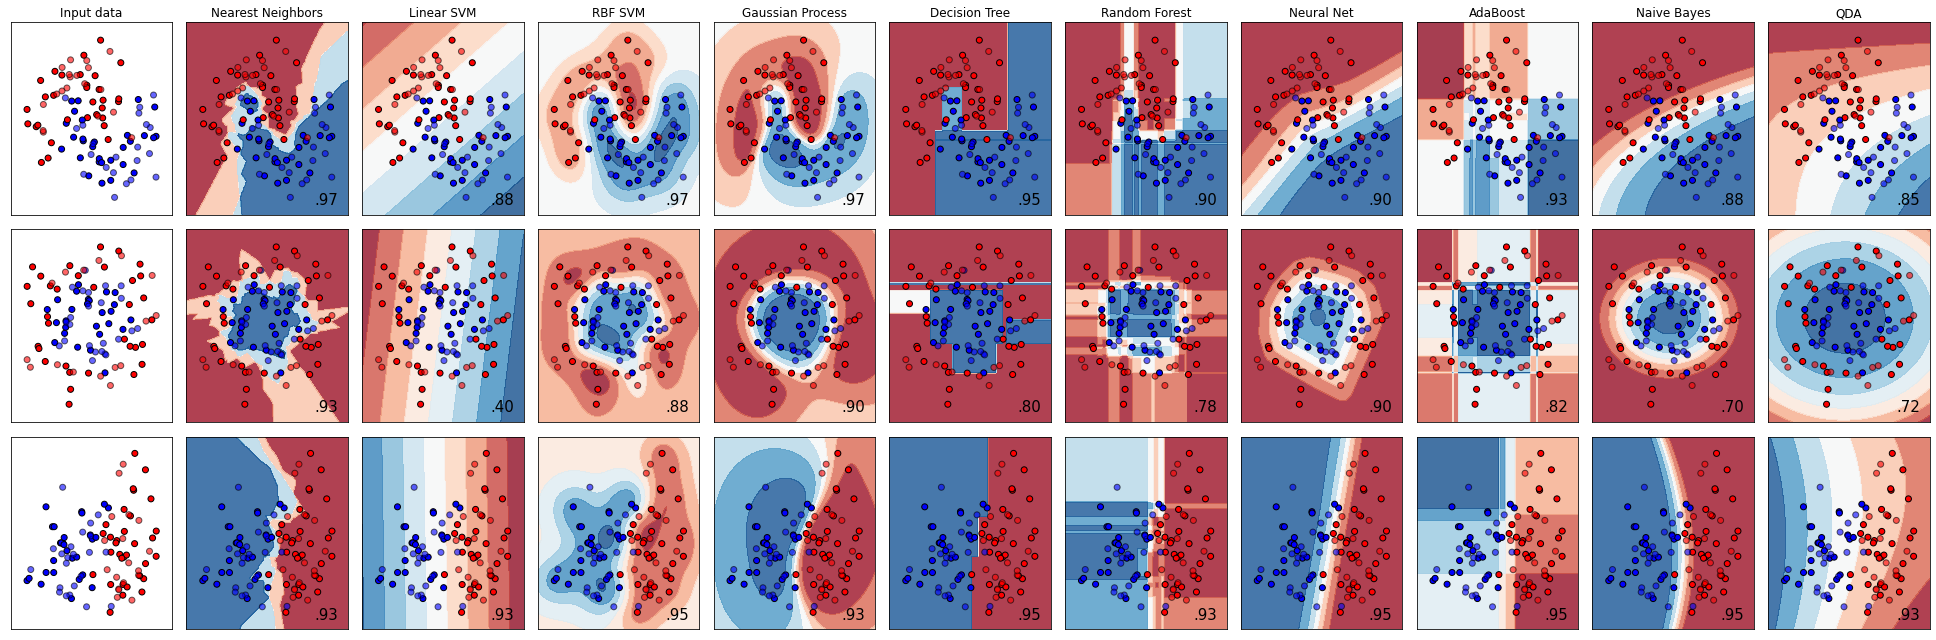

In [225]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [226]:
j

NameError: name 'j' is not defined

# Second Approach for Dummies - IMPUTATION

In [ ]:
train = pd.read_csv('./Data\Train_clu.csv') 
test = pd.read_csv('./Data\Test.csv')
submission = pd.read_csv('./Data\sample_submission.csv') 

In [ ]:
train.drop(['Segmentation', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
train.rename(columns = {'cluster':'Segmentation'}, inplace = True)

In [ ]:
train.isna().sum().sort_values(ascending=False)

In [ ]:
#train['Gender'] = train['Gender'].map({'Male' : 0, 'Female': 1})
test['Gender'] = test['Gender'].map({'Male' : 0, 'Female': 1})
#train['Ever_Married'] = train['Ever_Married'].map({'No':0, 'Yes':1})
test['Ever_Married'] = test['Ever_Married'].map({'No':0, 'Yes':1})
#train['Graduated'] = train['Graduated'].map({'No':0, 'Yes':1})
test['Graduated'] = test['Graduated'].map({'No':0, 'Yes':1})
#train['Segmentation'] = train['Segmentation'].map({'A':1, 'B':2, 'C':3, 'D':4 })


In [ ]:
train

In [ ]:
test

In [ ]:
test.drop('ID', axis=1, inplace=True)
#train.drop('ID', axis=1, inplace=True)

In [ ]:
#Dummies
profesion = pd.get_dummies(train.Profession,drop_first=True)
spending =pd.get_dummies(train.Spending_Score,drop_first=True)
var =pd.get_dummies(train.Var_1,drop_first=True)
train=pd.concat([profesion, spending, var, train],axis=1)
train.head()
train.drop(['Profession', 'Spending_Score', 'Var_1'], axis = 1, inplace = True)
train.head()


In [ ]:
profesion = pd.get_dummies(test.Profession,drop_first=True)
spending =pd.get_dummies(test.Spending_Score,drop_first=True)
var =pd.get_dummies(test.Var_1,drop_first=True)
test=pd.concat([profesion, spending, var, test],axis=1)
test.head()
test.drop(['Profession', 'Spending_Score', 'Var_1'], axis = 1, inplace = True)
test.head()

In [ ]:
train

In [ ]:
#Scaling 
num_vars = ['Age', 'Family_Size', 'Work_Experience']
scaler = StandardScaler()
train[num_vars] = scaler.fit_transform(train[num_vars])
test[num_vars] = scaler.fit_transform(test[num_vars])


In [ ]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(train)

In [ ]:
train.isna().sum()

In [ ]:
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(test)

In [ ]:
train.isna().sum()

In [ ]:

# make new columns indicating what will be imputed
cols_with_missing = (col for col in train.columns 
                                 if train[col].isnull().any())
for col in cols_with_missing:
    train[col + '_was_missing'] = train[col].isnull()

# Imputation
my_imputer = SimpleImputer()
train = pd.DataFrame(my_imputer.fit_transform(train))


In [ ]:
train.isna().sum()

In [ ]:

# make new columns indicating what will be imputed
cols_with_missing = (col for col in test.columns 
                                 if test[col].isnull().any())
for col in cols_with_missing:
    test[col + '_was_missing'] = test[col].isnull()

# Imputation
my_imputer = SimpleImputer()
test = pd.DataFrame(my_imputer.fit_transform(test))


In [ ]:
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
train = train.rename(columns={23:'Segmentation'})
train

In [ ]:
train_svc_imp = train.copy()
test_svc_imp = test.copy()
train_lgbm_imp = train.copy()
test_lgbm_imp = test.copy()

In [ ]:
#Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Segmentation', axis=1), train.Segmentation, 
                                                    test_size=1/3, 
                                                    random_state=42,
                                                    stratify=train.Segmentation)

In [ ]:
for i in X_train.columns:
    print(X_train[i].unique())

In [ ]:
X_train[1].unique()

## Logistic Regression LR

In [ ]:
model1 = LogisticRegression(max_iter = 1e5,  multi_class='multinomial')
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
display(confusion_matrix(y_test, y_pred1))

print("Accuracy : ",accuracy_score(y_test, y_pred1)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred1, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred1,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred1,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred1))

In [ ]:
test

## KNN

In [ ]:
model2 = KNeighborsClassifier(5)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
display(confusion_matrix(y_test, y_pred2))

print("Accuracy : ",accuracy_score(y_test, y_pred2)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred2, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred2,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred2,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred2))


In [ ]:
model3 = KNeighborsClassifier(5, weights='distance')
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
display(confusion_matrix(y_test, y_pred3))

print("Accuracy : ",accuracy_score(y_test, y_pred3)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred3, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred3,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred3,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred3))

## SVC

In [ ]:
model4 = SVC(kernel = 'linear')
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
display(confusion_matrix(y_test, y_pred4))

print("Accuracy : ",accuracy_score(y_test, y_pred4)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred4, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred4,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred4,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred4))

In [ ]:
model5 = SVC()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
display(confusion_matrix(y_test, y_pred5))

print("Accuracy : ",accuracy_score(y_test, y_pred5)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred5, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred5,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred5,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred5))

## Gausian 

In [ ]:
model6 = GaussianNB()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
display(confusion_matrix(y_test, y_pred6))

print("Accuracy : ",accuracy_score(y_test, y_pred6)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred6, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred6,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred6,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred6))

## Deccision Tree

In [ ]:
model7 = DecisionTreeClassifier(random_state=10,criterion='gini')
model7.fit(X_train, y_train)
y_pred7= model7.predict(X_test)
display(confusion_matrix(y_test, y_pred7))

print("Accuracy : ",accuracy_score(y_test, y_pred7)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred7, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred7,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred7,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred7))


## Random Forest

In [ ]:

model8 = RandomForestClassifier()
model8.fit(X_train, y_train)
y_pred8= model8.predict(X_test)
display(confusion_matrix(y_test, y_pred8))

print("Accuracy : ",accuracy_score(y_test, y_pred8)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred8, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred8,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred8,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred8))

In [ ]:
pd.Series(model8.feature_importances_, index=X_train.columns).sort_values().plot.barh()

## AdaBoost

In [ ]:

model9 = AdaBoostClassifier()
model9.fit(X_train, y_train)
y_pred9= model9.predict(X_test)
display(confusion_matrix(y_test, y_pred9))

print("Accuracy : ",accuracy_score(y_test, y_pred9)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred9, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred9,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred9,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred9))

# XGB

In [ ]:
model10 = XGBClassifier()
model10.fit(X_train, y_train)
y_pred10= model10.predict(X_test)
display(confusion_matrix(y_test, y_pred10))

print("Accuracy : ",accuracy_score(y_test, y_pred10)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred10, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred10,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred10,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred10))

## LightGBM

In [ ]:
model11 = LGBMClassifier()
model11.fit(X_train, y_train)
y_pred11= model11.predict(X_test)
display(confusion_matrix(y_test, y_pred11))

print("Accuracy : ",accuracy_score(y_test, y_pred11)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred11, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred11,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred11,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred11))


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred11))

## CatBoost

In [ ]:
model12 = CatBoostClassifier()
model12.fit(X_train, y_train)
y_pred12= model12.predict(X_test)
display(confusion_matrix(y_test, y_pred12))

print("Accuracy : ",accuracy_score(y_test, y_pred12)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred12, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred12,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred12,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred12))

In [ ]:
a, p, r, f = [],[],[],[]
for model in [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12]:
    a.append(accuracy_score(y_test, model.predict(X_test)))
    p.append(precision_score(y_test, model.predict(X_test),average='macro'))
    r.append(recall_score(y_test, model.predict(X_test),average='macro'))
    f.append(f1_score(y_test, model.predict(X_test),average='macro'))
pd.DataFrame([a, p, r, f], columns = ['LR', 'KNN', 'KNNw', 'SVCl', 'SVC', 'NB', 'DT', 'RF', 'Ada', 'XGB', 'LGBM', 'Cat']).T.sort_values(by=2, ascending=False).rename(columns={0:'Accuaracy', 1: 'Precision', 2:'Recall', 3:'F1'})

In [ ]:
#test['prediction_n'] = model4.predict(test)

In [ ]:
#test['prediction_n']  = test['prediction_n'].map({1:'A', 2:'B', 3:'C', 4:'D'})

In [ ]:
#test.prediction_n.value_counts()

In [ ]:
#test.drop('prediction_n', axis=1, inplace=True)

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# PCA 

In [ ]:
train_pca.shape

In [ ]:
train_pca.isna().sum()

In [ ]:
test_pca.shape

In [ ]:
train_segmentation = train_pca['Segmentation'].copy()

In [ ]:
train_segmentation

In [ ]:
train_segmentation.isna().sum()

In [ ]:
train_segmentation.shape

In [ ]:
train_pca.drop('Segmentation', axis=1, inplace=True)

In [ ]:
train_pca.isna().sum()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(0.85)
pca.fit(train_pca)
train_pca=pca.transform(train_pca)

In [ ]:
train_pca.shape

In [ ]:
pca2=PCA(0.85)
pca2.fit(test_pca)
test_pca=pca2.transform(test_pca)

In [ ]:
test_pca.shape

In [ ]:
train_pca.shape

In [ ]:
train_pca=pd.DataFrame(train_pca, columns=['PC'+str(i) for i in range (1, train_pca.shape[1]+1)])

In [ ]:
train_pca.isna().sum()

In [ ]:
train_pca.shape

In [ ]:
train_segmentation.isna().sum()

In [ ]:
train_segmentation.shape

In [ ]:
train_segmentation.unique()

In [ ]:
train_pca

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_pca, train_segmentation, 
                                                    test_size=1/3, 
                                                    random_state=42,
                                                    stratify=train_segmentation)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

# LR

In [ ]:
model1 = LogisticRegression(max_iter = 1e5,  multi_class='multinomial')
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
display(confusion_matrix(y_test, y_pred1))

print("Accuracy : ",accuracy_score(y_test, y_pred1)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred1, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred1,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred1,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred1))

# KNN

In [ ]:
model2 = KNeighborsClassifier(5)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
display(confusion_matrix(y_test, y_pred2))

print("Accuracy : ",accuracy_score(y_test, y_pred2)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred2, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred2,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred2,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred2))


In [ ]:
model3 = KNeighborsClassifier(5, weights='distance')
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
display(confusion_matrix(y_test, y_pred3))

print("Accuracy : ",accuracy_score(y_test, y_pred3)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred3, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred3,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred3,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred3))

# SVC

In [ ]:
model4 = SVC(kernel = 'linear')
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
display(confusion_matrix(y_test, y_pred4))

print("Accuracy : ",accuracy_score(y_test, y_pred4)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred4, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred4,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred4,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred4))

In [ ]:
model5 = SVC()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
display(confusion_matrix(y_test, y_pred5))

print("Accuracy : ",accuracy_score(y_test, y_pred5)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred5, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred5,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred5,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred5))

# Gausian

In [ ]:
model6 = GaussianNB()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
display(confusion_matrix(y_test, y_pred6))

print("Accuracy : ",accuracy_score(y_test, y_pred6)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred6, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred6,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred6,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred6))

# DT

In [ ]:
model7 = DecisionTreeClassifier(random_state=10,criterion='gini')
model7.fit(X_train, y_train)
y_pred7= model7.predict(X_test)
display(confusion_matrix(y_test, y_pred7))

print("Accuracy : ",accuracy_score(y_test, y_pred7)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred7, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred7,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred7,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred7))



# RF

In [ ]:
model8 = RandomForestClassifier()
model8.fit(X_train, y_train)
y_pred8= model8.predict(X_test)
display(confusion_matrix(y_test, y_pred8))

print("Accuracy : ",accuracy_score(y_test, y_pred8)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred8, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred8,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred8,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred8))

# AdaBoost

In [ ]:
model9 = AdaBoostClassifier()
model9.fit(X_train, y_train)
y_pred9= model9.predict(X_test)
display(confusion_matrix(y_test, y_pred9))

print("Accuracy : ",accuracy_score(y_test, y_pred9)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred9, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred9,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred9,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred9))

# XGB

In [ ]:
model10 = XGBClassifier()
model10.fit(X_train, y_train)
y_pred10= model10.predict(X_test)
display(confusion_matrix(y_test, y_pred10))

print("Accuracy : ",accuracy_score(y_test, y_pred10)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred10, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred10,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred10,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred10))

# LightGBM

In [ ]:
model11 = LGBMClassifier()
model11.fit(X_train, y_train)
y_pred11= model11.predict(X_test)
display(confusion_matrix(y_test, y_pred11))

print("Accuracy : ",accuracy_score(y_test, y_pred11)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred11, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred11,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred11,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred11))


# Catboost

In [ ]:
model12 = CatBoostClassifier()
model12.fit(X_train, y_train)
y_pred12= model12.predict(X_test)
display(confusion_matrix(y_test, y_pred12))

print("Accuracy : ",accuracy_score(y_test, y_pred12)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred12, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred12,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred12,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred12))

In [ ]:
a, p, r, f = [],[],[],[]
for model in [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12]:
    a.append(accuracy_score(y_test, model.predict(X_test)))
    p.append(precision_score(y_test, model.predict(X_test),average='macro'))
    r.append(recall_score(y_test, model.predict(X_test),average='macro'))
    f.append(f1_score(y_test, model.predict(X_test),average='macro'))
pd.DataFrame([a, p, r, f], columns = ['LR', 'KNN', 'KNNw', 'SVCl', 'SVC', 'NB', 'DT', 'RF', 'Ada', 'XGB', 'LGBM', 'Cat']).T.sort_values(by=2, ascending=False).rename(columns={0:'Accuaracy', 1: 'Precision', 2:'Recall', 3:'F1'})

## Clustering

#X_train, X_test, y_train, y_test = train_test_split(train_clu.drop('Segmentation', axis=1), train.Segmentation, 
                                                    test_size=1/3, 
                                                    random_state=42,
                                                    stratify=train.Segmentation)

In [ ]:
train_clu.columns

In [ ]:
train

In [ ]:
col = ['Doctor', 'Engineer', 'Entertainment', 'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'Unknown', 'High', 'Low', 2, 3, 4, 5, 6, 7, 'Gender', 'Ever_Married', 'Age', 'Graduated','Work_Experience', 'Family_Size']

In [ ]:
y = train_clu['Segmentation'] 

In [ ]:
X = train_clu[col]

In [ ]:
X

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model13=KMeans()


In [ ]:
model13=KMeans(4)
model13.fit(X)
model13.predict(X)

In [ ]:
train_clu['cluster'] = model13.labels_

In [ ]:
pd.crosstab(train_clu.cluster, train_clu.Segmentation).plot(kind='kde')

In [ ]:
pd.crosstab(train_clu.cluster, train_clu.Segmentation)

In [ ]:
X

In [ ]:
visualizer = KElbowVisualizer(estimator = KMeans(), k=(2,10))
visualizer.fit(X)
visualizer.poof()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
model14= DBSCAN(eps=1.3)
model14.fit(X)
model14.fit_predict(X)

In [ ]:
train_clu['clusterDB'] = model14.labels_

In [ ]:
pd.crosstab(train_clu.clusterDB, train_clu.Segmentation)

In [ ]:
train_clu.drop('clusterDB', inplace=True, axis=1) 

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
test = train_clu['cluster']

# HyperParameter Tunning  

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

train_svc
test_svc
train_lgbm
test_lgbm


train_svc_imp
test_svc_imp
train_lgbm_im
test_lgbm_imp

In [ ]:
train_svc

In [ ]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(train_svc.drop('Segmentation', axis=1), train_svc.Segmentation, 
                                                    test_size=1/3, 
                                                    random_state=42,
                                                    stratify=train_svc.Segmentation)

In [ ]:
LGBM

In [ ]:
model14 = SVC()
model14.fit(X_train_svc, y_train_svc)
y_pred14 = model14.predict(X_test)
display(confusion_matrix(y_test, y_pred14))

print("Accuracy : ",accuracy_score(y_test, y_pred14)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred14, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred14,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred14,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred14))


In [ ]:
model15 = SVC(C=3, coef0= 0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='rbf', random_state=42)
model14.fit(X_train_svc, y_train_svc)
y_pred14 = model14.predict(X_test)
display(confusion_matrix(y_test, y_pred14))

print("Accuracy : ",accuracy_score(y_test, y_pred14)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred14, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred14,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred14,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred14))


In [ ]:
model15 = SVC(C=3, coef0= 0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='rbf')
model14.fit(X_train_svc, y_train_svc)
y_pred14 = model14.predict(X_test)
display(confusion_matrix(y_test, y_pred14))

print("Accuracy : ",accuracy_score(y_test, y_pred14)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred14, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred14,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred14,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred14))

In [ ]:
model15.predict(test_svc)

params = {
    'C': range(1, 5),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':range(2,6),
    'gamma':['scale', 'auto'],
    'coef0':range(0, 1),
    'decision_function_shape':['ovo', 'ovr'],
    'random_state':[42] }

model15 = SVC()
grid = GridSearchCV(estimator=model15, param_grid=params, n_jobs=-1, scoring='accuracy', verbose=1)

grid.fit(X_train_svc, y_train_svc)

grid.best_params_

grid.best_score_

'split', result contains numbers of times the feature is used in a model.
'gain'

 = ['regression', 'binary', 'multiclass', 'lambdarank']

params = {'boosting_type':['gbdt', 'dart', 'goss', 'rf'],
    'objective':['regression', 'binary', 'multiclass', 'lambdarank'],
    'class_weight':[None, 'balanced'],
    'importance_type':['split', 'gain']}

X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(train_lgbm.drop('Segmentation', axis=1), train_lgbm.Segmentation, 
                                                    test_size=1/3, 
                                                    random_state=42,
                                                    stratify=train_lgbm.Segmentation)



model16 = LGBMClassifier()
model16.fit(X_train_lgbm, y_train_lgbm)
y_pred16= model16.predict(X_test_lgbm)
display(confusion_matrix(y_test_lgbm, y_pred16))

print("Accuracy : ",accuracy_score(y_test_lgbm, y_pred16)) 
                                          
print("Precision Score : ",precision_score(y_test_lgbm, y_pred16, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test_lgbm, y_pred16,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test_lgbm, y_pred16,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test_lgbm, y_pred16))


model16 = LGBMClassifier()
grid = GridSearchCV(estimator=model16, param_grid=params, n_jobs=-1, scoring='accuracy', verbose=1)

grid.fit(X_train_lgbm, y_train_lgbm)

grid.best_params_

grid.best_score_

test_lgbm['predict'] = grid.predict(test_lgbm)

test_lgbm.predict.value_counts(normalize=True)*100

grid.predict(test_lgbm)
print("Accuracy : ",accuracy_score(y_test_lgbm, grid.predict(test_lgbm))) 
                                          
print("Precision Score : ",precision_score(y_test_lgbm, grid.predict(test_lgbm), 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test_lgbm, grid.predict(test_lgbm),
                                           average='macro'))
print("F1 Score : ",f1_score(y_test_lgbm, grid.predict(test_lgbm),
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test_lgbm, grid.predict(test_lgbm)))


model15 = SVC(kernel='linear')
model14.fit(X_train_svc, y_train_svc)
y_pred14 = model14.predict(X_test)
display(confusion_matrix(y_test, y_pred14))

print("Accuracy : ",accuracy_score(y_test, y_pred14)) 
                                          
print("Precision Score : ",precision_score(y_test, y_pred14, 
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred14,
                                           average='macro'))
print("F1 Score : ",f1_score(y_test, y_pred14,
                                           average='macro'))
print("Classification Report: \n", classification_report(y_test, y_pred14))